# <center>Machine Learning Project</center>

** **
## <center>*01 - Exploratory Data Analysis & Preprocessing*</center>

** **

The members of the `team` are:
- Ana Farinha - 20211514
- Francisco Capontes - 20211692
- Sofia Gomes - 20240848
- Rui Lourenço - 2021639


## <span style="color:salmon"> Description of the project  </span> 

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, volunteer firefighters, volunteer ambulance workers, and volunteer civil defence workers’ benefits. As the regulating authority, the WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury. Since 2000, the WCB has assembled and reviewed more than 5 million claims.

However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received.

## <span style="color:salmon"> Table of Contents </span>

<a class="anchor" id="top"></a>

1. [Importing Libraries & Data](#1-importing-libraries--data) <br><br>

2. [Exploratory Data Analysis](#2-exploratory-data-analysis) <br>  
   2.1 [Initial Exploration](#21-initial-exploration) <br>  
   2.2 [Duplicates](#22-duplicates) <br>  
   2.3 [Missing Values](#23-missing-values) <br>  
   2.4 [Target Distribution](#24-target-distribution) <br>  
   2.5 [Numerical Variables](#25-numerical-variables) <br>  
   2.6 [Categorical Variables](#26-categorical-variables) <br>  
   2.7 [Date Variables](#27-date-variables) <br><br>  

3. [Clean and Pre-processing](#3-clean-and-pre-processing) <br>  
   3.1 [Data Types](#31-data-types) <br>  
   3.2 [Incoherencies](#32-incoherencies) <br>  
   3.3 [Handling Missing Values](#33-handling-missing-values) <br>  
   3.4 [Removing Outliers](#34-removing-outliers) <br><br>  

4. [Feature Engineering](#4-feature-engineering) <br>  
   4.1 [Creating New Features](#41-creating-new-features) <br>  
   4.2 [Transforming Existing Features](#42-transforming-existing-features) <br><br>  

5. [Other Visualizations](#5-other-visualizations) <br><br>  

6. [Variable Encoding](#6-variable-encoding) <br><br>

7. [Scaling](#7-scaling) <br><br>

8. [Feature Selection](#8-feature-selection) <br><br>  

9. [Simple Model](#9-simple-model)  <br><br>  

10. [Export Data](#10-export-data) <br>


## <span style="color:salmon"> 1. Import Libraries & Data  </span> 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import os

# Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Missing Values
import missingno as msno

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Encoding libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher

from sklearn.preprocessing import StandardScaler

from utils import *

In [2]:
train_df = pd.read_csv('./project_data/train_data.csv')
train_df

C:\Users\ruipb\AppData\Local\Temp\ipykernel_22164\1279091846.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./project_data/train_data.csv')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <span style="color:salmon"> 2. Exploratory Data Analysis  </span> 

#### <span style="color:salmon"> 2.1 Initial Exploration </span> 

In order to better understand the dataset we can use some functions, like the following:

1. See the first ten lines 

In [3]:
train_df.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
6,2019-12-28,48.0,N,2020-01-01,N,0.00,1971.0,2019-12-31,NaN,LM INSURANCE CORP,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0
7,2019-12-30,33.0,N,2020-01-01,N,0.00,1986.0,2019-12-31,2020-03-04,STATE INSURANCE FUND,...,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",38.0,SHOULDER(S),10305,0.0,Not Work Related,6.0
8,2019-12-23,55.0,N,2020-01-01,N,0.00,1964.0,2020-01-01,NaN,"ROCHESTER, UNIVERSITY OF",...,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",60.0,LUNGS,14620,0.0,Not Work Related,6.0
9,2019-12-29,20.0,N,2020-01-01,N,225.00,NaN,2019-12-31,NaN,LM INSURANCE CORP,...,81.0,"STRUCK OR INJURED, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",14.0,EYE(S),11231,0.0,Not Work Related,6.0


2. Get information about the data types in each column, non-null values and memory usage

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

3. Get the shape of the dataset

In [5]:
train_df.shape

(593471, 33)

#### <span style="color:salmon"> 2.2 Duplicates </span> 

This section is divided into two main parts: checking for duplicated `Claim Indentifier` and searching for duplicated rows.

1.  Check for duplicated IDs

This dataset contains a variable called `Claim Identifier` which should be unique to each injuty claim / row. 

In [6]:
# Search for duplicated 'Claim Identifier'
train_df['Claim Identifier'].duplicated().sum()

1

Above, it can be verified the existence of two rows with the same `Claim Identifier`. To better understand why that happened, it can be seen below the rows with the same IDs.

In [7]:
# Check for duplicated values in 'Claim Identifier'
duplicated_claims = train_df['Claim Identifier'].duplicated(keep=False)

train_df[duplicated_claims]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The rows are almost empty so we decided to drop these two. Afterwards, the possibility of existing similar almost empty rows will be explored.

In [8]:
train_df.drop_duplicates(subset='Claim Identifier', keep=False, inplace=True)

After dropping the repeated `Claim Identifier`, the variable was set as the index.

In [9]:
train_df = train_df.set_index('Claim Identifier')

2. Search for duplicated rows

In [10]:
print(f'There are {train_df.duplicated().sum()} duplicated rows, which represent {(train_df.duplicated().sum()/len(train_df) * 100):.1f}% of the dataset')

There are 18348 duplicated rows, which represent 3.1% of the dataset


Before deciding what to do with these duplicated rows, lets explore them a bit.

In [11]:
train_df[train_df.duplicated(keep=False)].describe()

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
mean,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
std,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
min,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
25%,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
50%,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
75%,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
max,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


Above are the descriptive statistics of the duplicated rows. It mostly contains missing values. As such, we decided to remove them.

In [12]:
train_df = train_df.drop_duplicates(keep=False)

#### <span style="color:salmon"> 2.3 Missing Values </span> 

The first thing we are going to do is to check for missing values in our target variable.

In [13]:
train_df[train_df['Claim Injury Type'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


After, we checked for the percentage of missing values in the columns.

In [14]:
# Display the percentage of missing values per column

missing_values = train_df.isnull().sum() / len(train_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

OIICS Nature of Injury Description    100.000000
IME-4 Count                            76.864556
First Hearing Date                     73.730018
C-3 Date                               67.380632
Birth Year                              5.065642
Average Weekly Wage                     4.991255
Zip Code                                4.988816
WCIO Part Of Body Code                  2.975485
WCIO Part Of Body Description           2.975485
WCIO Nature of Injury Code              2.727238
WCIO Nature of Injury Description       2.727238
WCIO Cause of Injury Code               2.724276
WCIO Cause of Injury Description        2.724276
C-2 Date                                2.536131
Industry Code Description               1.734422
Industry Code                           1.734422
Accident Date                           0.642308
dtype: float64

Columns like `OIICS Nature of Injury Description`, `IME-4 Count`, and `First Hearing Date` have over 60% missing, with some 100% missing. These may need to be removed or further investigated. Columns such as `Birth Year`, `Average Weekly Wage`, and `Zip Code` have around 5% missing and can likely be imputed. Columns like `Accident Date` and `Industry Code` have minimal missing data (below 1%) and can be imputed or removed with minimal impact.

Actions include removing columns with 100% missing data, imputing or removing columns with 60%-70% missing values, imputing columns with 2%-5% missing data, and reviewing columns with <1% missing for possible imputation or removal.


After seeing the columns with more missing values, let's check the rows.

In [15]:
# Calculate the percentage of missing values per row
missing_percentage_per_row = (train_df.isnull().sum(axis=1) / train_df.shape[1]) * 100

missing_percentage_per_row.sort_values(ascending=False)


Claim Identifier
6069612    46.875
5865689    46.875
5551614    46.875
5774568    46.875
5803002    46.875
            ...  
5515381     3.125
5775549     3.125
6002519     3.125
5775500     3.125
5999580     3.125
Length: 574024, dtype: float64

The dataset shows a wide range of missing values per row. Some rows, identified by `Claim Identifier`, have a significantly high percentage of missing values, with several rows showing 44.12% missing data. On the other hand, a few rows exhibit much lower missing percentages, as low as 2.94%. 

This indicates that a large proportion of the data for certain rows is missing, while others have relatively fewer missing values. Rows with more than 40% missing data may require special handling, such as imputation or removal, depending on the context and importance of the data.

**Heatmap of Missing Values**

The heatmap shows correlations between missing values in different columns, revealing if missingness in one column is associated with missingness in another.

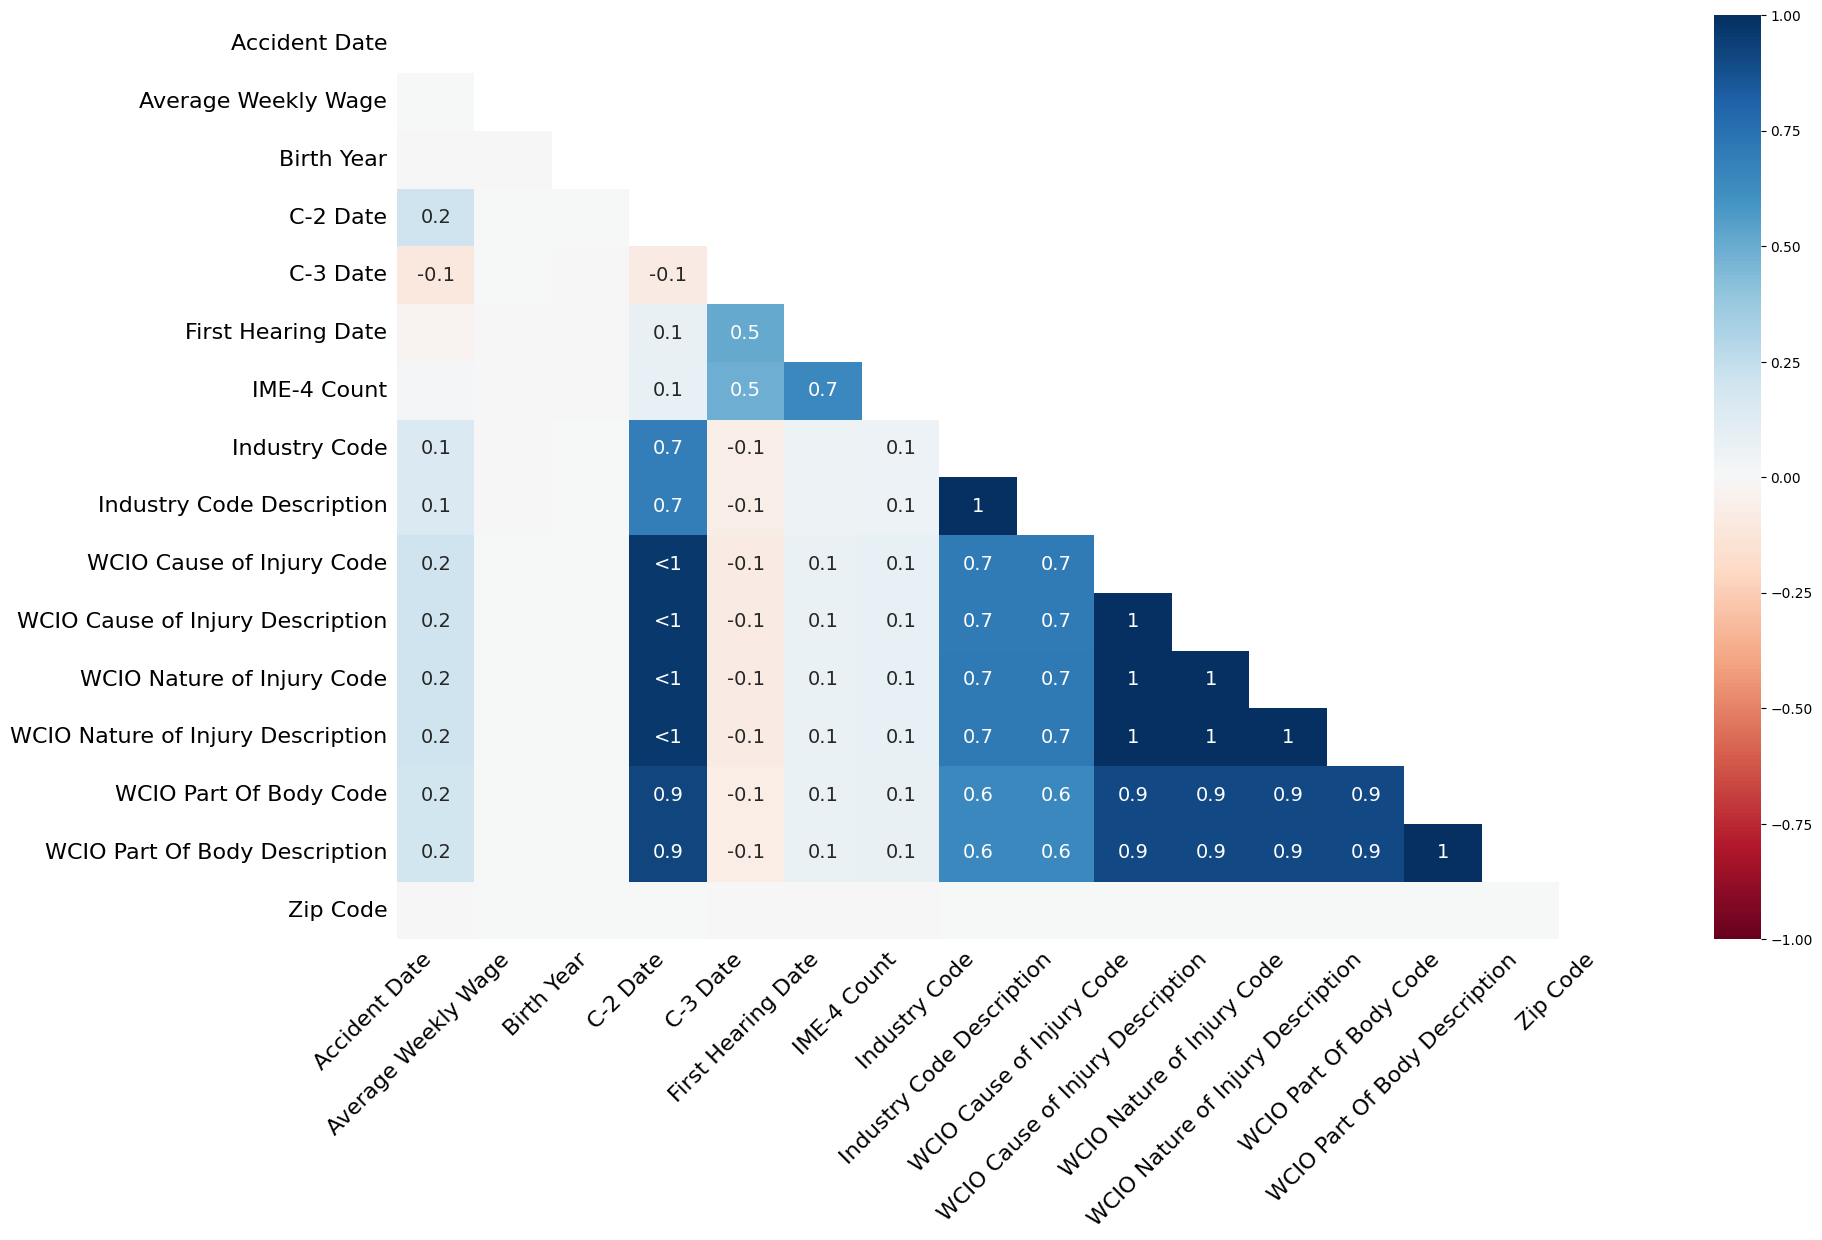

In [16]:
msno.heatmap(train_df)
plt.show()

Conclusions about this heatmap:
* A high correlation 0.9, suggesting that when one is missing, the other often is too, like in WCIO
* A correlation 0.5 to 0.7 imply a weaker but still noteworthy relationship, like in WCIO and Industry code
* A correlation close to zero or negative imply little to no relationship, suggesting that missingness in one column does not predict missingness in the other, like in Accident date, average weekly wage and others

**Dendogram of Missing Values**

The dendrogram groups columns with similar patterns of missing values. It’s useful for identifying clusters of columns that have related missing data patterns, which might be caused by specific conditions or categories.

<Figure size 1200x600 with 0 Axes>

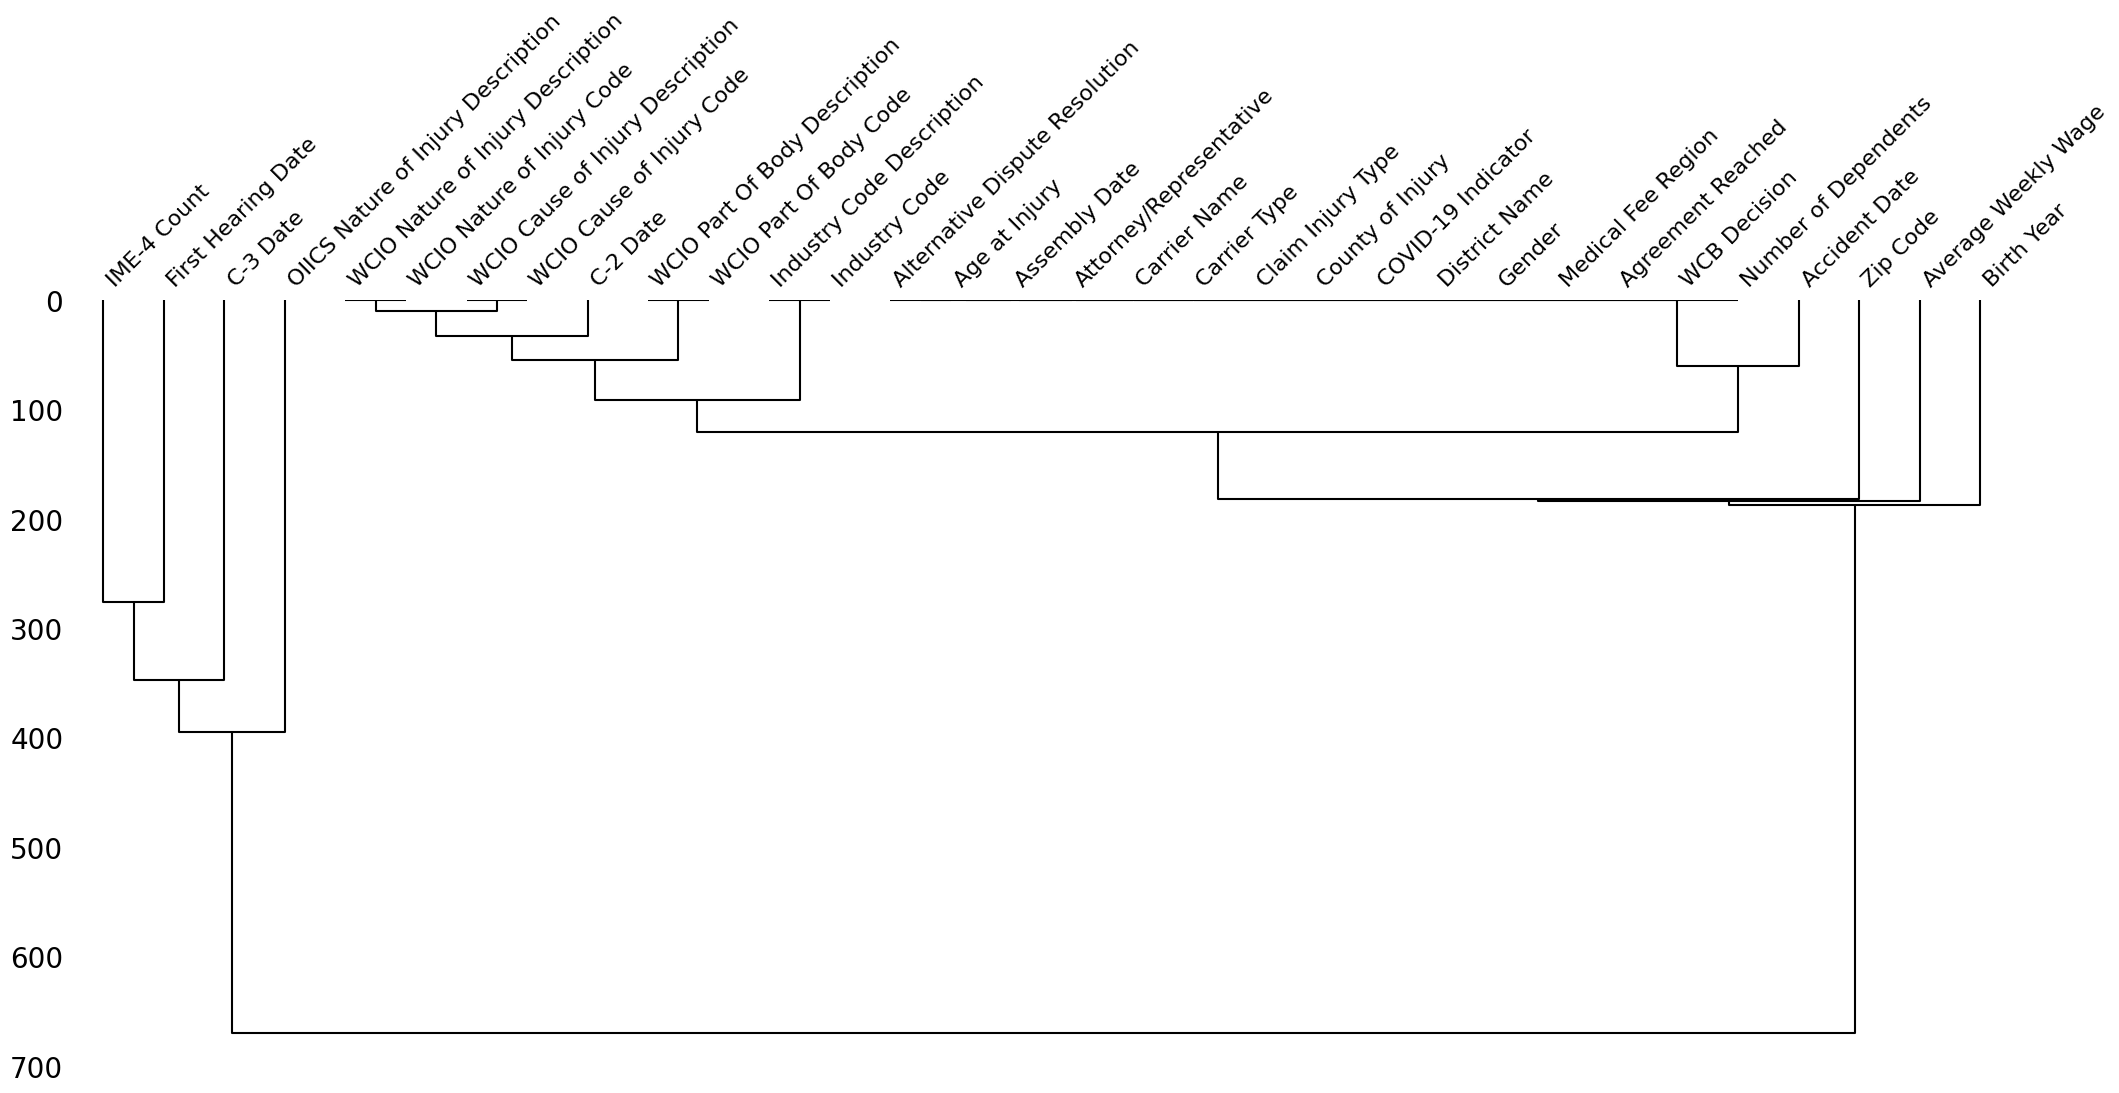

In [17]:
plt.figure(figsize=(12, 6))
msno.dendrogram(train_df)
plt.show()

Conclusions about dendrogram:
* We can divide this in two parts:
    1. IME-4 count, first hearing date, C-3 Date
    2. remaining columns

#### <span style="color:salmon"> 2.4 Target Distribution </span> 

To get to know our data, we started by exploring the target variable `Claim Injury Type`. To do so, we created a freaquency bar chart.

<Axes: title={'center': 'Frequency of Claim Injury Type'}, xlabel='Claim Injury Type', ylabel='count'>

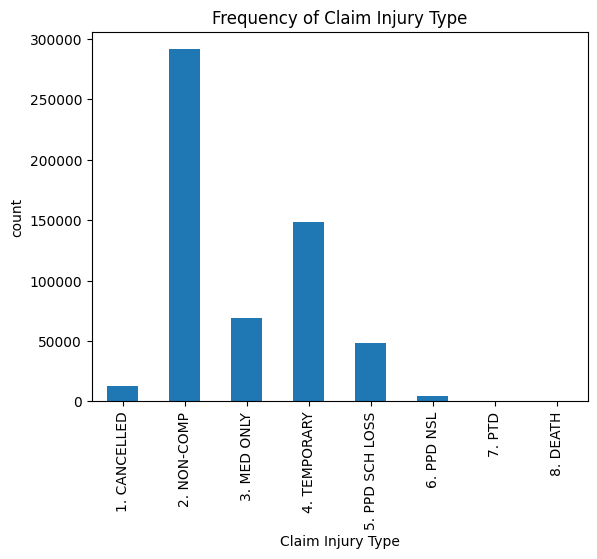

In [18]:
# Using value_counts to get counts per state and plotting
train_df['Claim Injury Type'].value_counts().sort_index().plot(kind='bar', xlabel='Claim Injury Type', ylabel='count', title='Frequency of Claim Injury Type')

Conclusions about the frequency of Claim Injury type:
* There is a large discrepancy between the values
* The most frequent is NON-COMP
* The one with the lowest frequency is PTD and DEATH

#### <span style="color:salmon"> 2.5 Numerical Variables </span> 

Numerical variables represent measurable quantities and can be analyzed mathematically. <br>  
The numerical variables that exist in this dataset are:

In [19]:
numerical_features = [
    'Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents'
]

In [20]:
numerical_df = train_df[numerical_features]
numerical_df

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents
Claim Identifier,,,,,
5393875,31.0,0.00,1988.0,NaN,1.0
5393091,46.0,1745.93,1973.0,4.0,4.0
5393889,40.0,1434.80,1979.0,NaN,6.0
5393887,61.0,NaN,1958.0,NaN,1.0
5393863,67.0,0.00,1952.0,NaN,5.0
...,...,...,...,...,...
6165265,35.0,0.00,1987.0,NaN,4.0
6165285,33.0,0.00,1989.0,NaN,6.0
6165506,61.0,991.08,1961.0,1.0,3.0


Show some statistics about the numerical_df:

In [21]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574024.0,42.114417,14.256240,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545373.0,491.090122,6092.929220,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544946.0,1886.767305,414.645155,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Number of Dependents,574024.0,3.006569,2.000797,0.0,1.0,3.0,5.0,6.0



- **Age at Injury**: 
    - Mean age is 42.11 years with a standard deviation of 14.26
    - The ages range from 0 to 117 years, with the 25th percentile at 31, the median at 42, and the 75th percentile at 54
    - 75% of the people has 54 age at injury
- **Average Weekly Wage**: 
    - Mean weekly wage is 491.09 with a very high standard deviation of 6092.92
    - The wages range from 0 to a maximum of 2,828,079
    - 75% have an average weekly wage of 841
- **Birth Year**: 
    - The mean birth year is around 1886.77 with a standard deviation of 414.64
    - The birth years range from 0 to 2018
- **IME-4 Count**: 
    - Mean count is 3.21 with a standard deviation of 2.83
- **Number of Dependents**: 
    - Mean is 3 and the standard deviation is 2
    - The range of number of dependencies is 0 to 6



For a better understanding of the numerical_features, we did some plots:

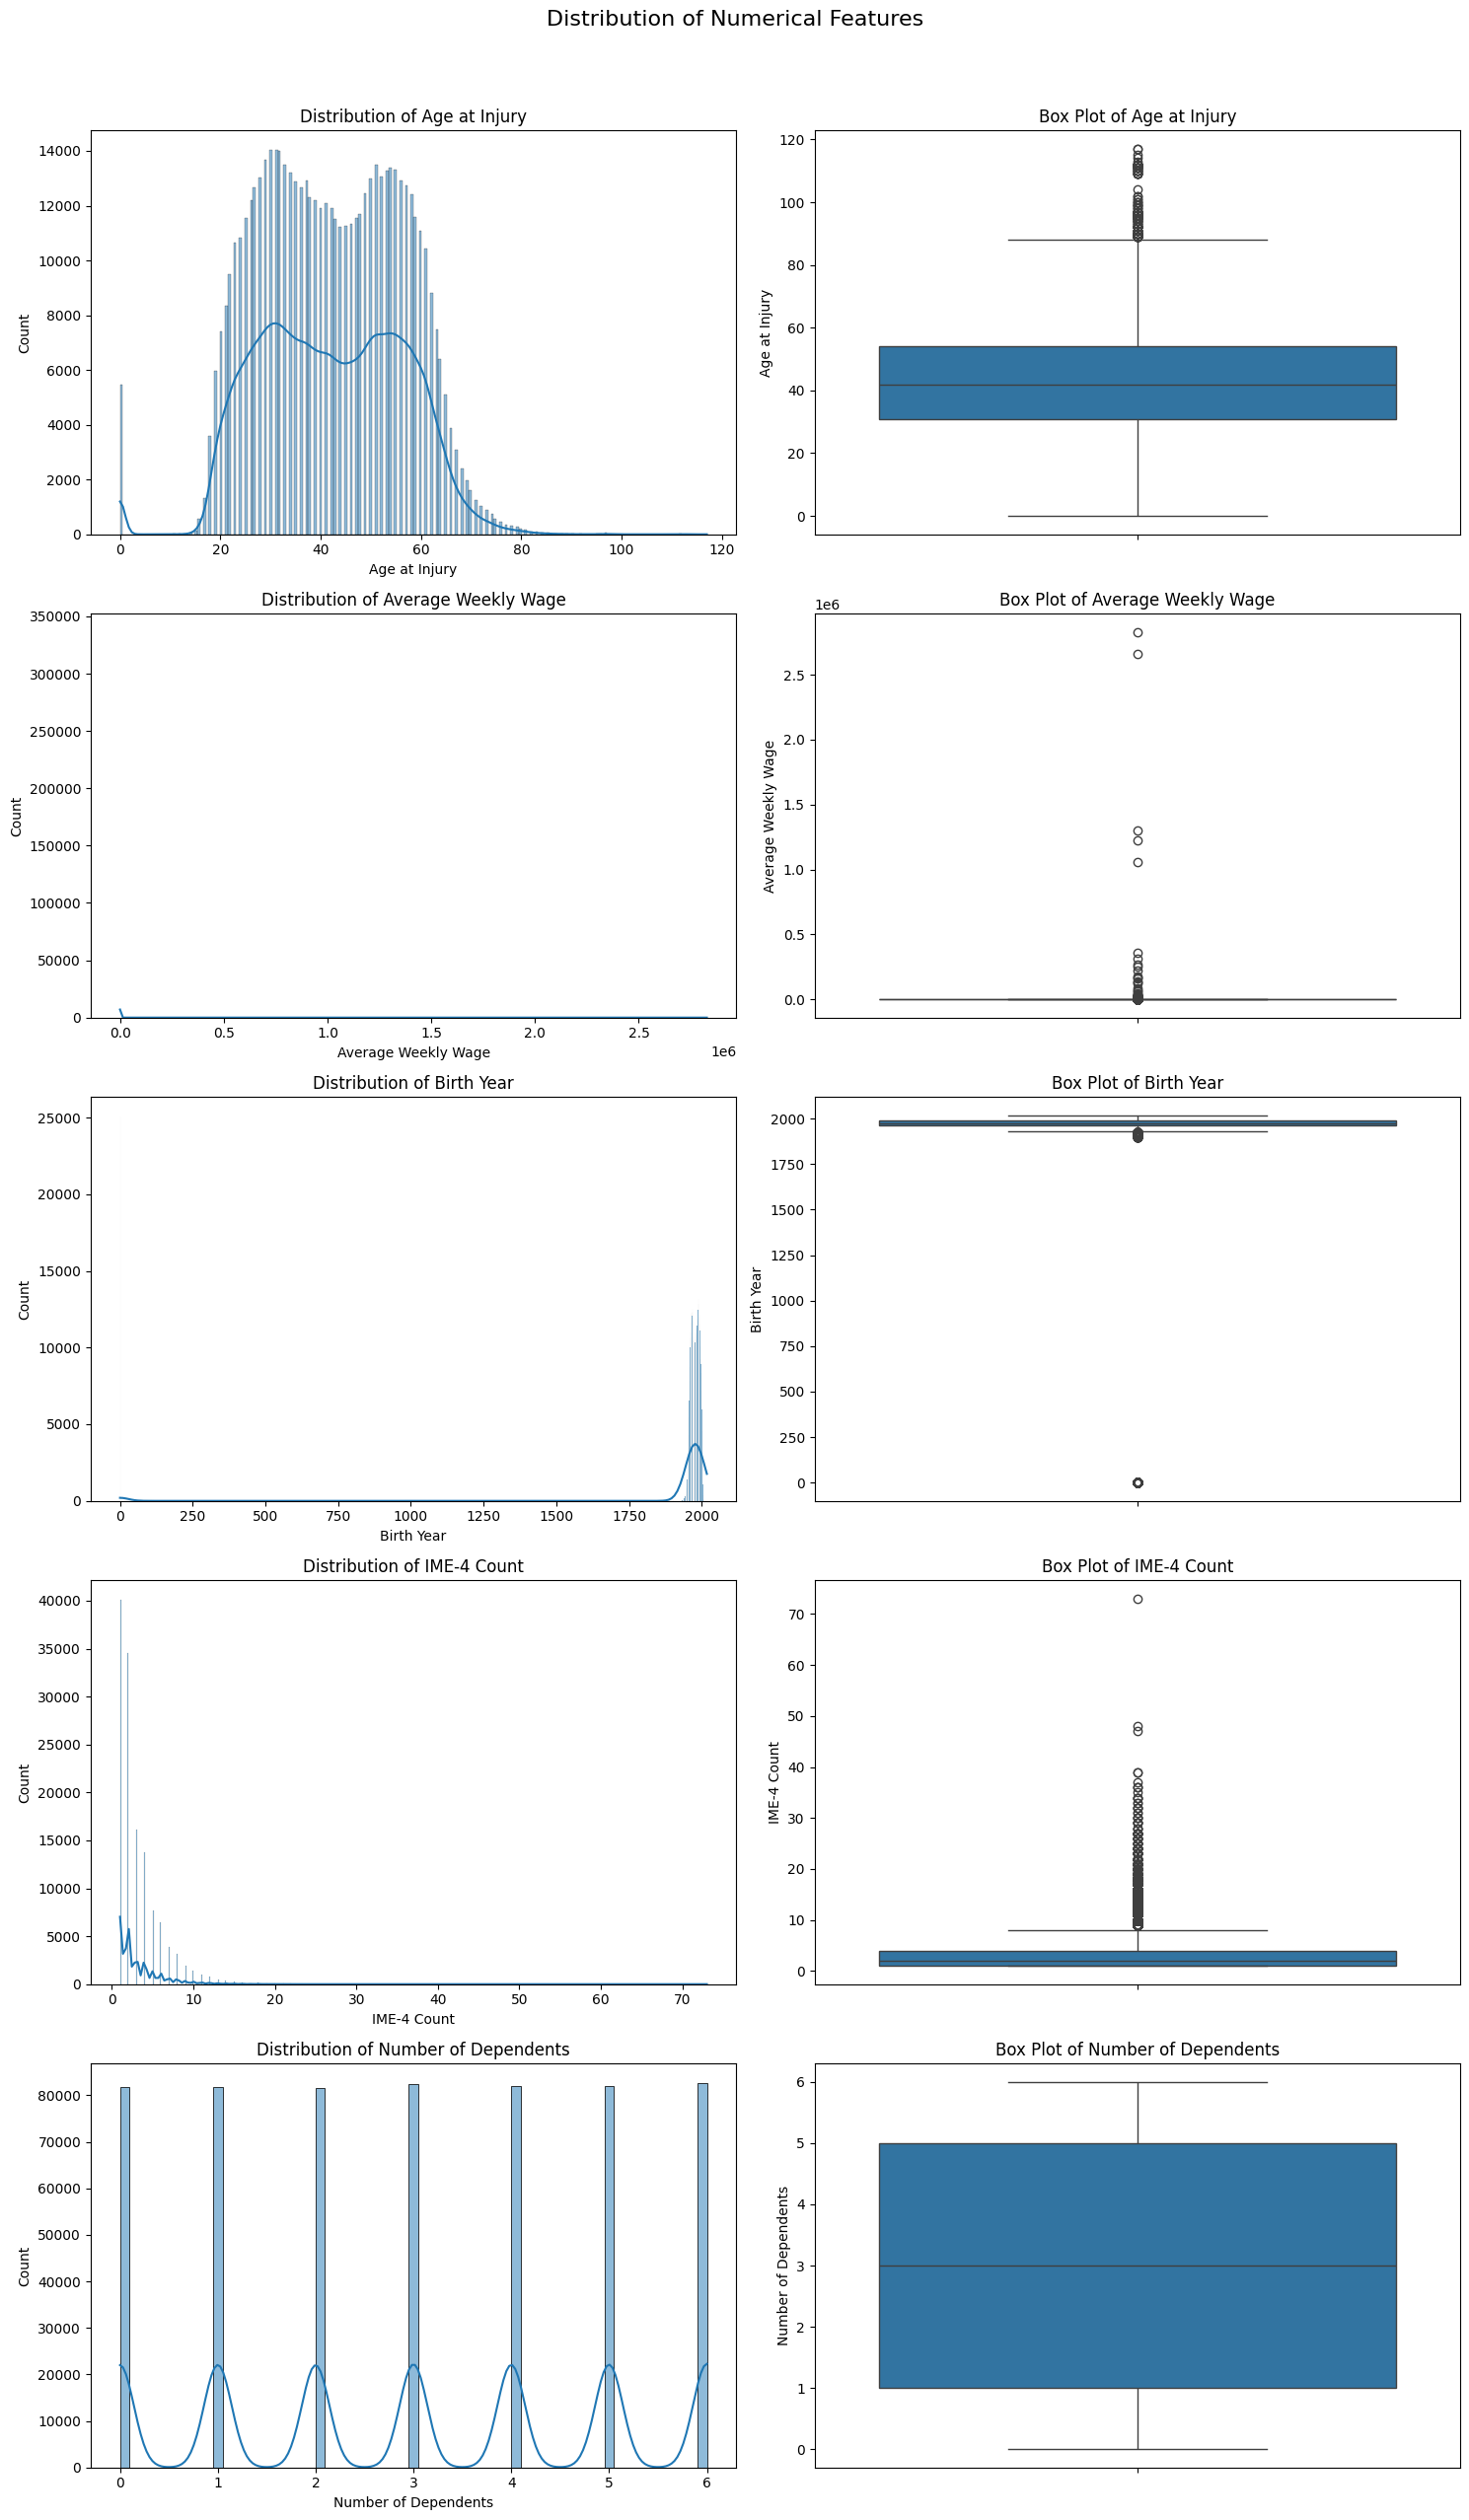

In [22]:
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 5*len(numerical_features)))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)
    
for idx, feature in enumerate(numerical_features):
    # Histogram with KDE
    sns.histplot(data=numerical_df, x=feature, kde=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribution of {feature}')
    axes[idx, 0].set_xlabel(feature)
        
    # Box plot
    sns.boxplot(data=numerical_df, y=feature, ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Box Plot of {feature}')
    
plt.tight_layout()
plt.show()

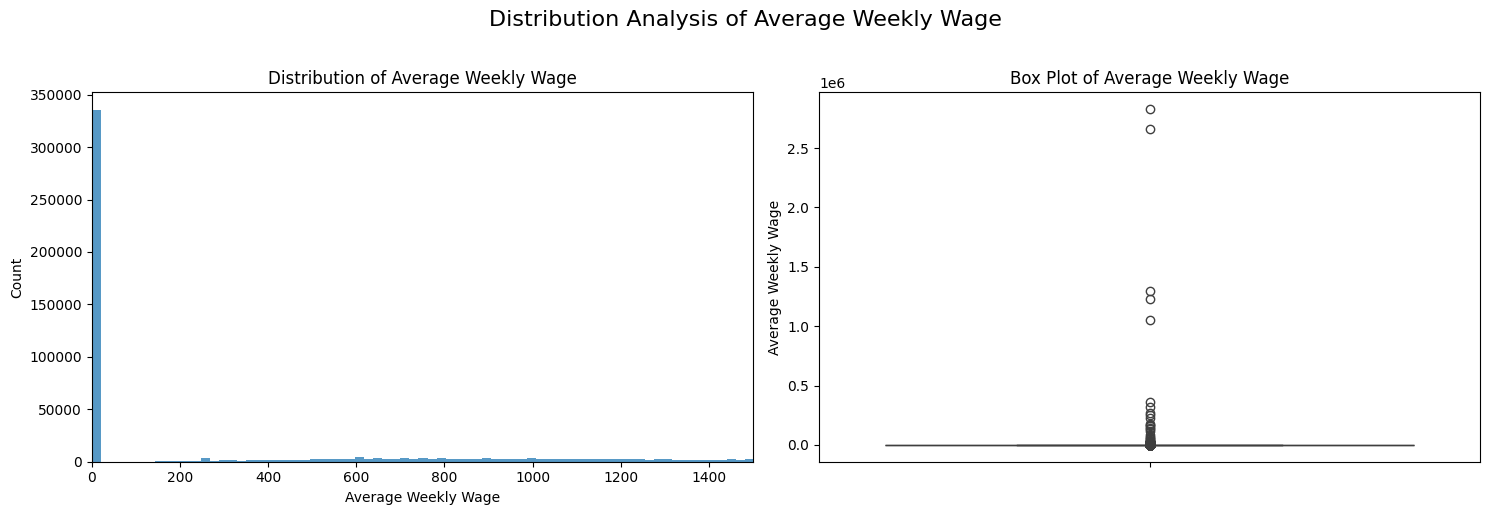

In [23]:
# Specify the feature you want to analyze
feature = "Average Weekly Wage"

# Set up a 1x2 subplot for the histogram and box plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(f'Distribution Analysis of {feature}', fontsize=16, y=1.02)

# Histogram with KDE
sns.histplot(data=numerical_df, x=feature, kde=False, ax=axes[0])
axes[0].set_title(f'Distribution of {feature}')
axes[0].set_xlabel(feature)

# Set x-axis limits to accommodate larger values
axes[0].set_xlim(0, 1500)  # Adjust the upper limit as needed

# Box plot
sns.boxplot(data=numerical_df, y=feature, ax=axes[1])
axes[1].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

- **Age at Injury**: 
    - The distribution of ages at injury is unimodal, with peaks around 30 and 60 years old.
    - Most injuries occur between 20 and 60 years of age.
    - There are outliers in the data, including some extremely high values that may be inaccurate.
- **Average Weekly Wage**: 
    - A significant portion of the data has an average weekly wage of 0.0, indicating potential missing or incorrect data.
- **Birth Year**: 
    - The data contains an invalid birth year of 0.
- **IME-4 Count**: 
    - A majority of the IME-4 Count values are missing(NaN).
- **Number of Dependents**: 
    - The distribution of the number of dependents is relatively uniform, with values ranging from 0 to 6.
    - The majority of the values are between the 1 and 5 dependents



We then created correlation matrix of numerical features.

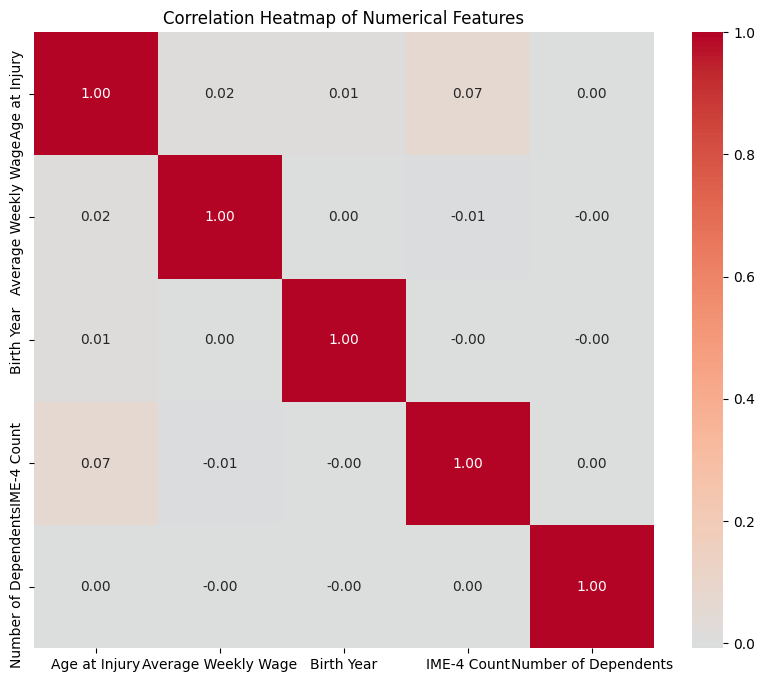

In [24]:
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

As we can see, we can not see any significant correlation with any of the numerical features. We concluded that actuay they have 0 correlation between them.

We will do some scatter plots for age-related and financial features to see if we can get any relationship

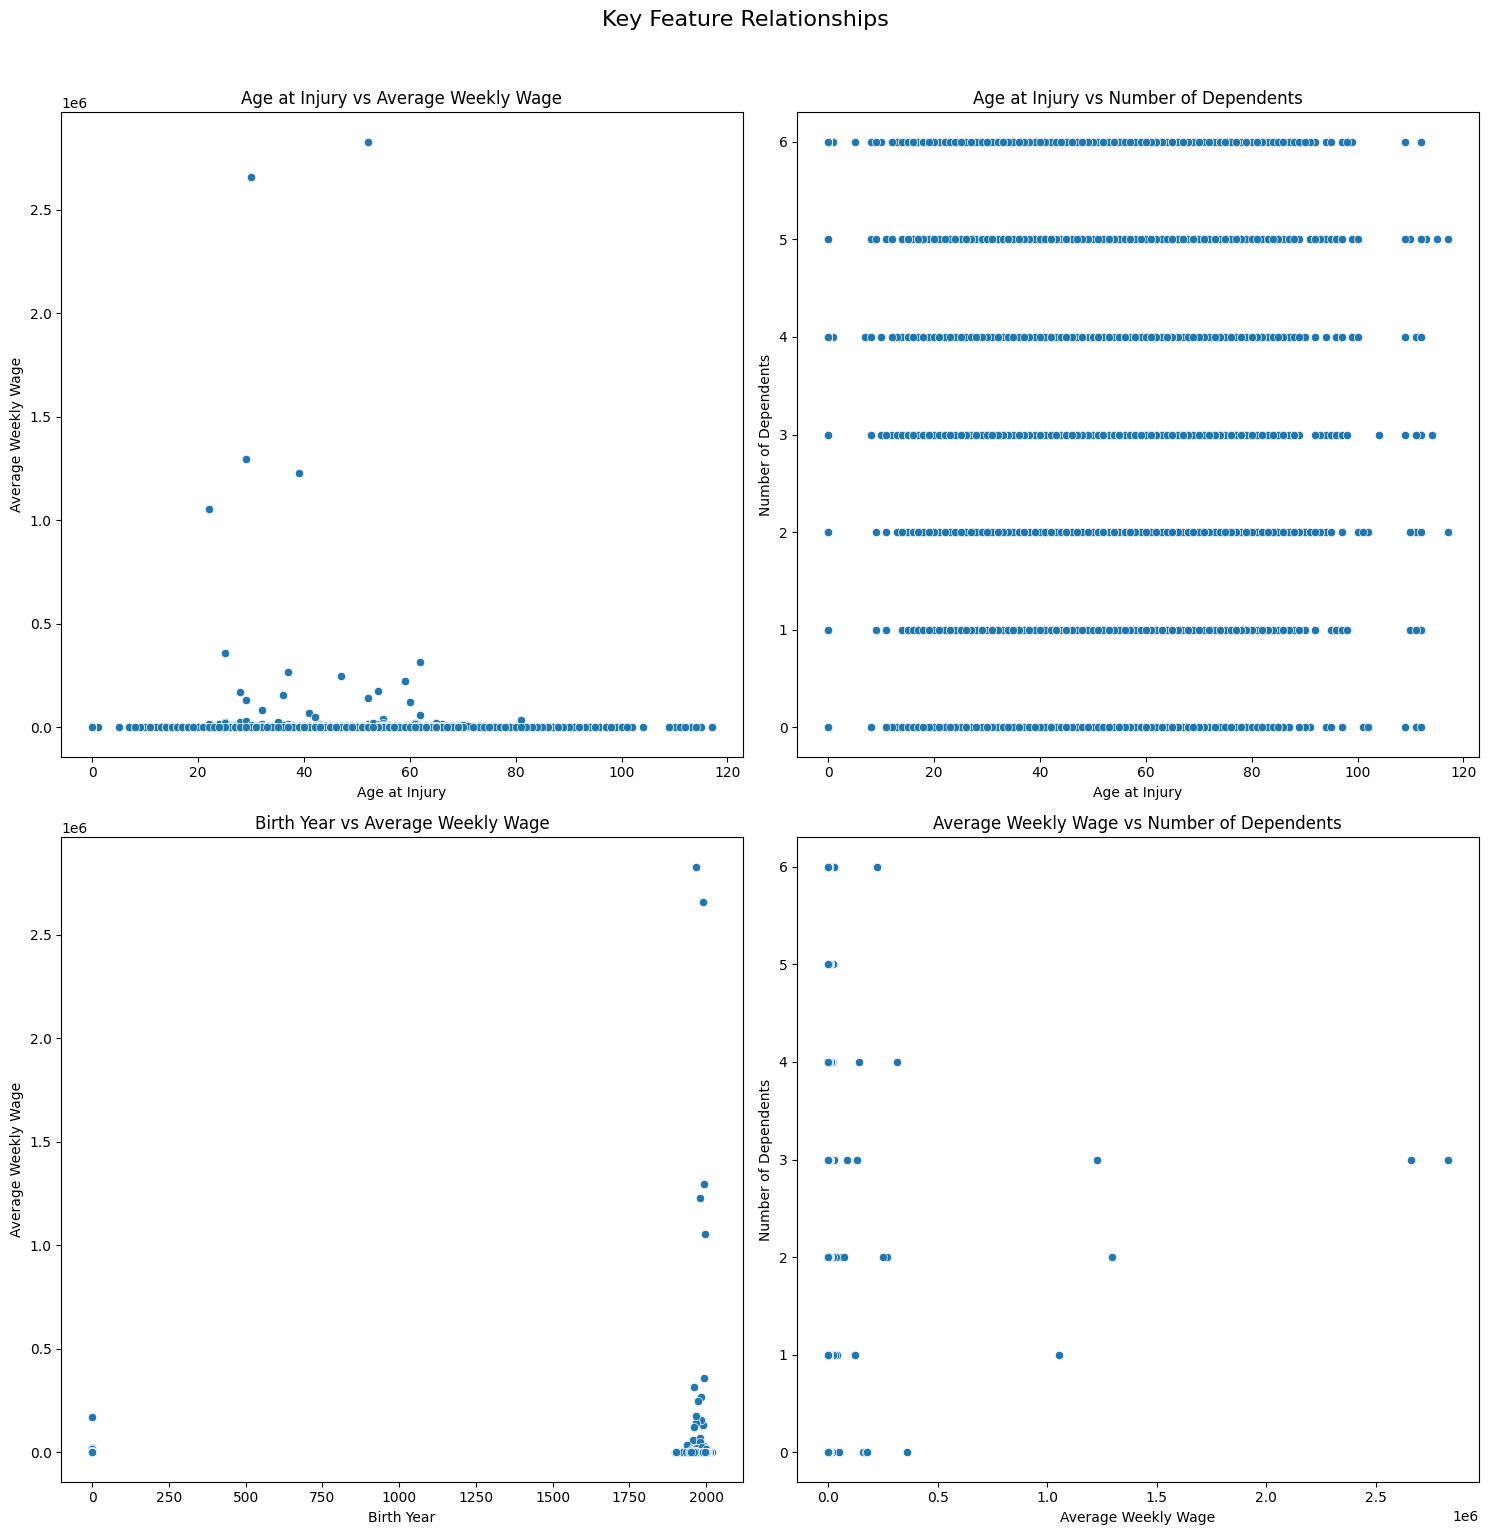

In [25]:
# Setting up the figure
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Key Feature Relationships', fontsize=16, y=1.02)

# Age at Injury vs Average Weekly Wage
sns.scatterplot(data=numerical_df, 
                x='Age at Injury', 
                y='Average Weekly Wage',
                ax=axes[0, 0])
axes[0, 0].set_title('Age at Injury vs Average Weekly Wage')

# Age at Injury vs Number of Dependents
sns.scatterplot(data=numerical_df, 
                x='Age at Injury', 
                y='Number of Dependents',
                ax=axes[0, 1])
axes[0, 1].set_title('Age at Injury vs Number of Dependents')

# Birth Year vs Average Weekly Wage
sns.scatterplot(data=numerical_df, 
                x='Birth Year', 
                y='Average Weekly Wage',
                ax=axes[1, 0])
axes[1, 0].set_title('Birth Year vs Average Weekly Wage')

# Average Weekly Wage vs Number of Dependents
sns.scatterplot(data=numerical_df, 
                x='Average Weekly Wage', 
                y='Number of Dependents',
                ax=axes[1, 1])
axes[1, 1].set_title('Average Weekly Wage vs Number of Dependents')
    
plt.tight_layout()
plt.show()

We can't conclude much from combining feature<br>
    *The missing values produce much noise*

#### <span style="color:salmon"> 2.6 Categorical Variables </span> 

Categorical variables represent characteristics or qualities that group data into distinct categories or labels. <br>  
In this dataset, the categorical variables are:

In [26]:
categorical_features = [
    'Alternative Dispute Resolution', 'Attorney/Representative',
    'Carrier Name',  'Carrier Type', 'County of Injury',
    'COVID-19 Indicator',  'District Name', 'Gender', 'Industry Code',
    'Industry Code Description',  'Medical Fee Region',  'WCIO Cause of Injury Code',
    'WCIO Cause of Injury Description',  'WCIO Nature of Injury Code',
    'WCIO Nature of Injury Description',  'WCIO Part Of Body Code',
    'WCIO Part Of Body Description',  'Zip Code', 'Agreement Reached',
    'WCB Decision', 'Claim Injury Type'
]

In [27]:
categorical_df = train_df[categorical_features]
categorical_df

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Industry Code Description,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,N,N,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ST. LAWRENCE,N,SYRACUSE,M,44.0,RETAIL TRADE,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,2. NON-COMP
5393091,N,Y,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WYOMING,N,ROCHESTER,F,23.0,CONSTRUCTION,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4. TEMPORARY
5393889,N,N,INDEMNITY INSURANCE CO OF,1A. PRIVATE,ORANGE,N,ALBANY,M,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,4. TEMPORARY
5393887,N,N,STATE INSURANCE FUND,2A. SIF,DUTCHESS,N,ALBANY,M,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,2. NON-COMP
5393863,N,N,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,SUFFOLK,N,HAUPPAUGE,M,44.0,RETAIL TRADE,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,3. MED ONLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165265,N,N,STATE INSURANCE FUND,2A. SIF,BRONX,N,NYC,M,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,...,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10.0,CONTUSION,42.0,LOWER BACK AREA,10467,0.0,Not Work Related,2. NON-COMP
6165285,N,N,WESCO INSURANCE CO,1A. PRIVATE,NASSAU,N,NYC,M,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",37.0,INFLAMMATION,35.0,HAND,11590,0.0,Not Work Related,2. NON-COMP
6165506,N,N,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,ERIE,N,BUFFALO,F,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,...,98.0,"CUMULATIVE, NOC",80.0,"ALL OTHER CUMULATIVE INJURY, NOC",34.0,WRIST,14227,0.0,Not Work Related,4. TEMPORARY


Show some statistics about the categorical_df:

In [28]:
categorical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574024.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


To facilitate the exploration of the categorical data, the second step taken was to see the unique values that each categorical variable has.

In [29]:
# Check unique values of the categorical variables
for column in categorical_df.columns:
    print('=========================')
    print(categorical_df[column].value_counts())
    print(f'Missing values: {categorical_df[column].isna().sum()}')
    print('=========================')
    print()

Alternative Dispute Resolution
N    571410
Y      2609
U         5
Name: count, dtype: int64
Missing values: 0

Attorney/Representative
N    392291
Y    181733
Name: count, dtype: int64
Missing values: 0

Carrier Name
STATE INSURANCE FUND            111144
POLICE, FIRE, SANITATION         21602
AMERICAN ZURICH INSURANCE CO     17540
CHARTER OAK FIRE INS CO          17176
INDEMNITY INS. OF N AMERICA      14366
                                 ...  
LOWES HOME CENTERS INC               1
WEST BEND MUTUAL INSURANCE           1
LIVINGSTON-STEUBEN-                  1
NEW YORK MUTUAL CASUALTY             1
HERMON-DEKALB CENTRAL                1
Name: count, Length: 2046, dtype: int64
Missing values: 0

Carrier Type
1A. PRIVATE                                    285366
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL

*Conclusiona about Categorical variables*
- **Alternative Dispute Resolution**: 
    - Majority with 'N' (571,412)
    - Minor counts of 'Y' (2,609) and 'U' (5), indicating few unspecified cases
- **Carrier Name**: 
    - Diverse field with *STATE INSURANCE FUND* as the largest category
    - Total of 2,046 unique insurance providers
- **Claim Injury Type**: 
    - Target variable with 8 distinct categories
- **County of Injury**: 
    - 63 unique counties, with significant representation from *SUFFOLK* and *QUEENS*
- **Attorney/Representative**: 
    - Majority of claims without legal representation ('N': 392,291 vs 'Y': 181,735)
- **Gender**: 
    - Gender variable includes unknown values ('U' and 'X'), which will be replaced with 'Unknown'
- **Industry Code Description**: 
    - Significant representation in sectors like *Health Care* and *Public Administration*



In order to examine the distribution of categorical features, focusing on rare categories, unknown values, or high cardinality, we create some plots:

First, let's get information about the number of unique values in each feature.

This information is very useful because:

- It helps you understand the complexity of each feature

- It guides how you should visualize each feature
    Binary features might be best as pie charts
    Features with few categories work well as bar plots
    Features with many categories might need to be grouped or shown partially


- It helps identify potential data quality issues
    Too many unique values might indicate spelling errors or inconsistent data entry
    Too few unique values might indicate missing categories

In [30]:
unique_counts = categorical_df.nunique().sort_values(ascending=True)
print("Number of unique values in each feature:")
print(unique_counts)

Number of unique values in each feature:
WCB Decision                             1
Attorney/Representative                  2
Agreement Reached                        2
COVID-19 Indicator                       2
Alternative Dispute Resolution           3
Gender                                   4
Medical Fee Region                       5
Carrier Type                             8
District Name                            8
Claim Injury Type                        8
Industry Code Description               20
Industry Code                           24
WCIO Part Of Body Description           54
WCIO Nature of Injury Code              56
WCIO Nature of Injury Description       56
WCIO Part Of Body Code                  57
County of Injury                        63
WCIO Cause of Injury Description        74
WCIO Cause of Injury Code               77
Carrier Name                          2046
Zip Code                             10060
dtype: int64


In [31]:
# Separate features based on number of unique values
few_categories = [feat for feat in categorical_features if train_df[feat].nunique() <= 10]
many_categories = [feat for feat in categorical_features if train_df[feat].nunique() > 10]

# O codigo abaixo da erro

In [32]:
#print("\nPlotting features with few categories")
#if few_categories:
#    plot_value_counts(train_df, few_categories)
    
#print("\nPlotting features with many categories (top 10 values shown)")
#if many_categories:
#    plot_value_counts(train_df, many_categories)

Number of unique values in each feature:
WCB Decision                             1
Attorney/Representative                  2
Agreement Reached                        2
COVID-19 Indicator                       2
Alternative Dispute Resolution           3
Gender                                   4
Medical Fee Region                       5
Carrier Type                             8
District Name                            8
Claim Injury Type                        8
Industry Code Description               20
Industry Code                           24
WCIO Part Of Body Description           54
WCIO Nature of Injury Code              56
WCIO Nature of Injury Description       56
WCIO Part Of Body Code                  57
County of Injury                        63
WCIO Cause of Injury Description        74
WCIO Cause of Injury Code               77
Carrier Name                          2046
Zip Code                             10060
dtype: int64


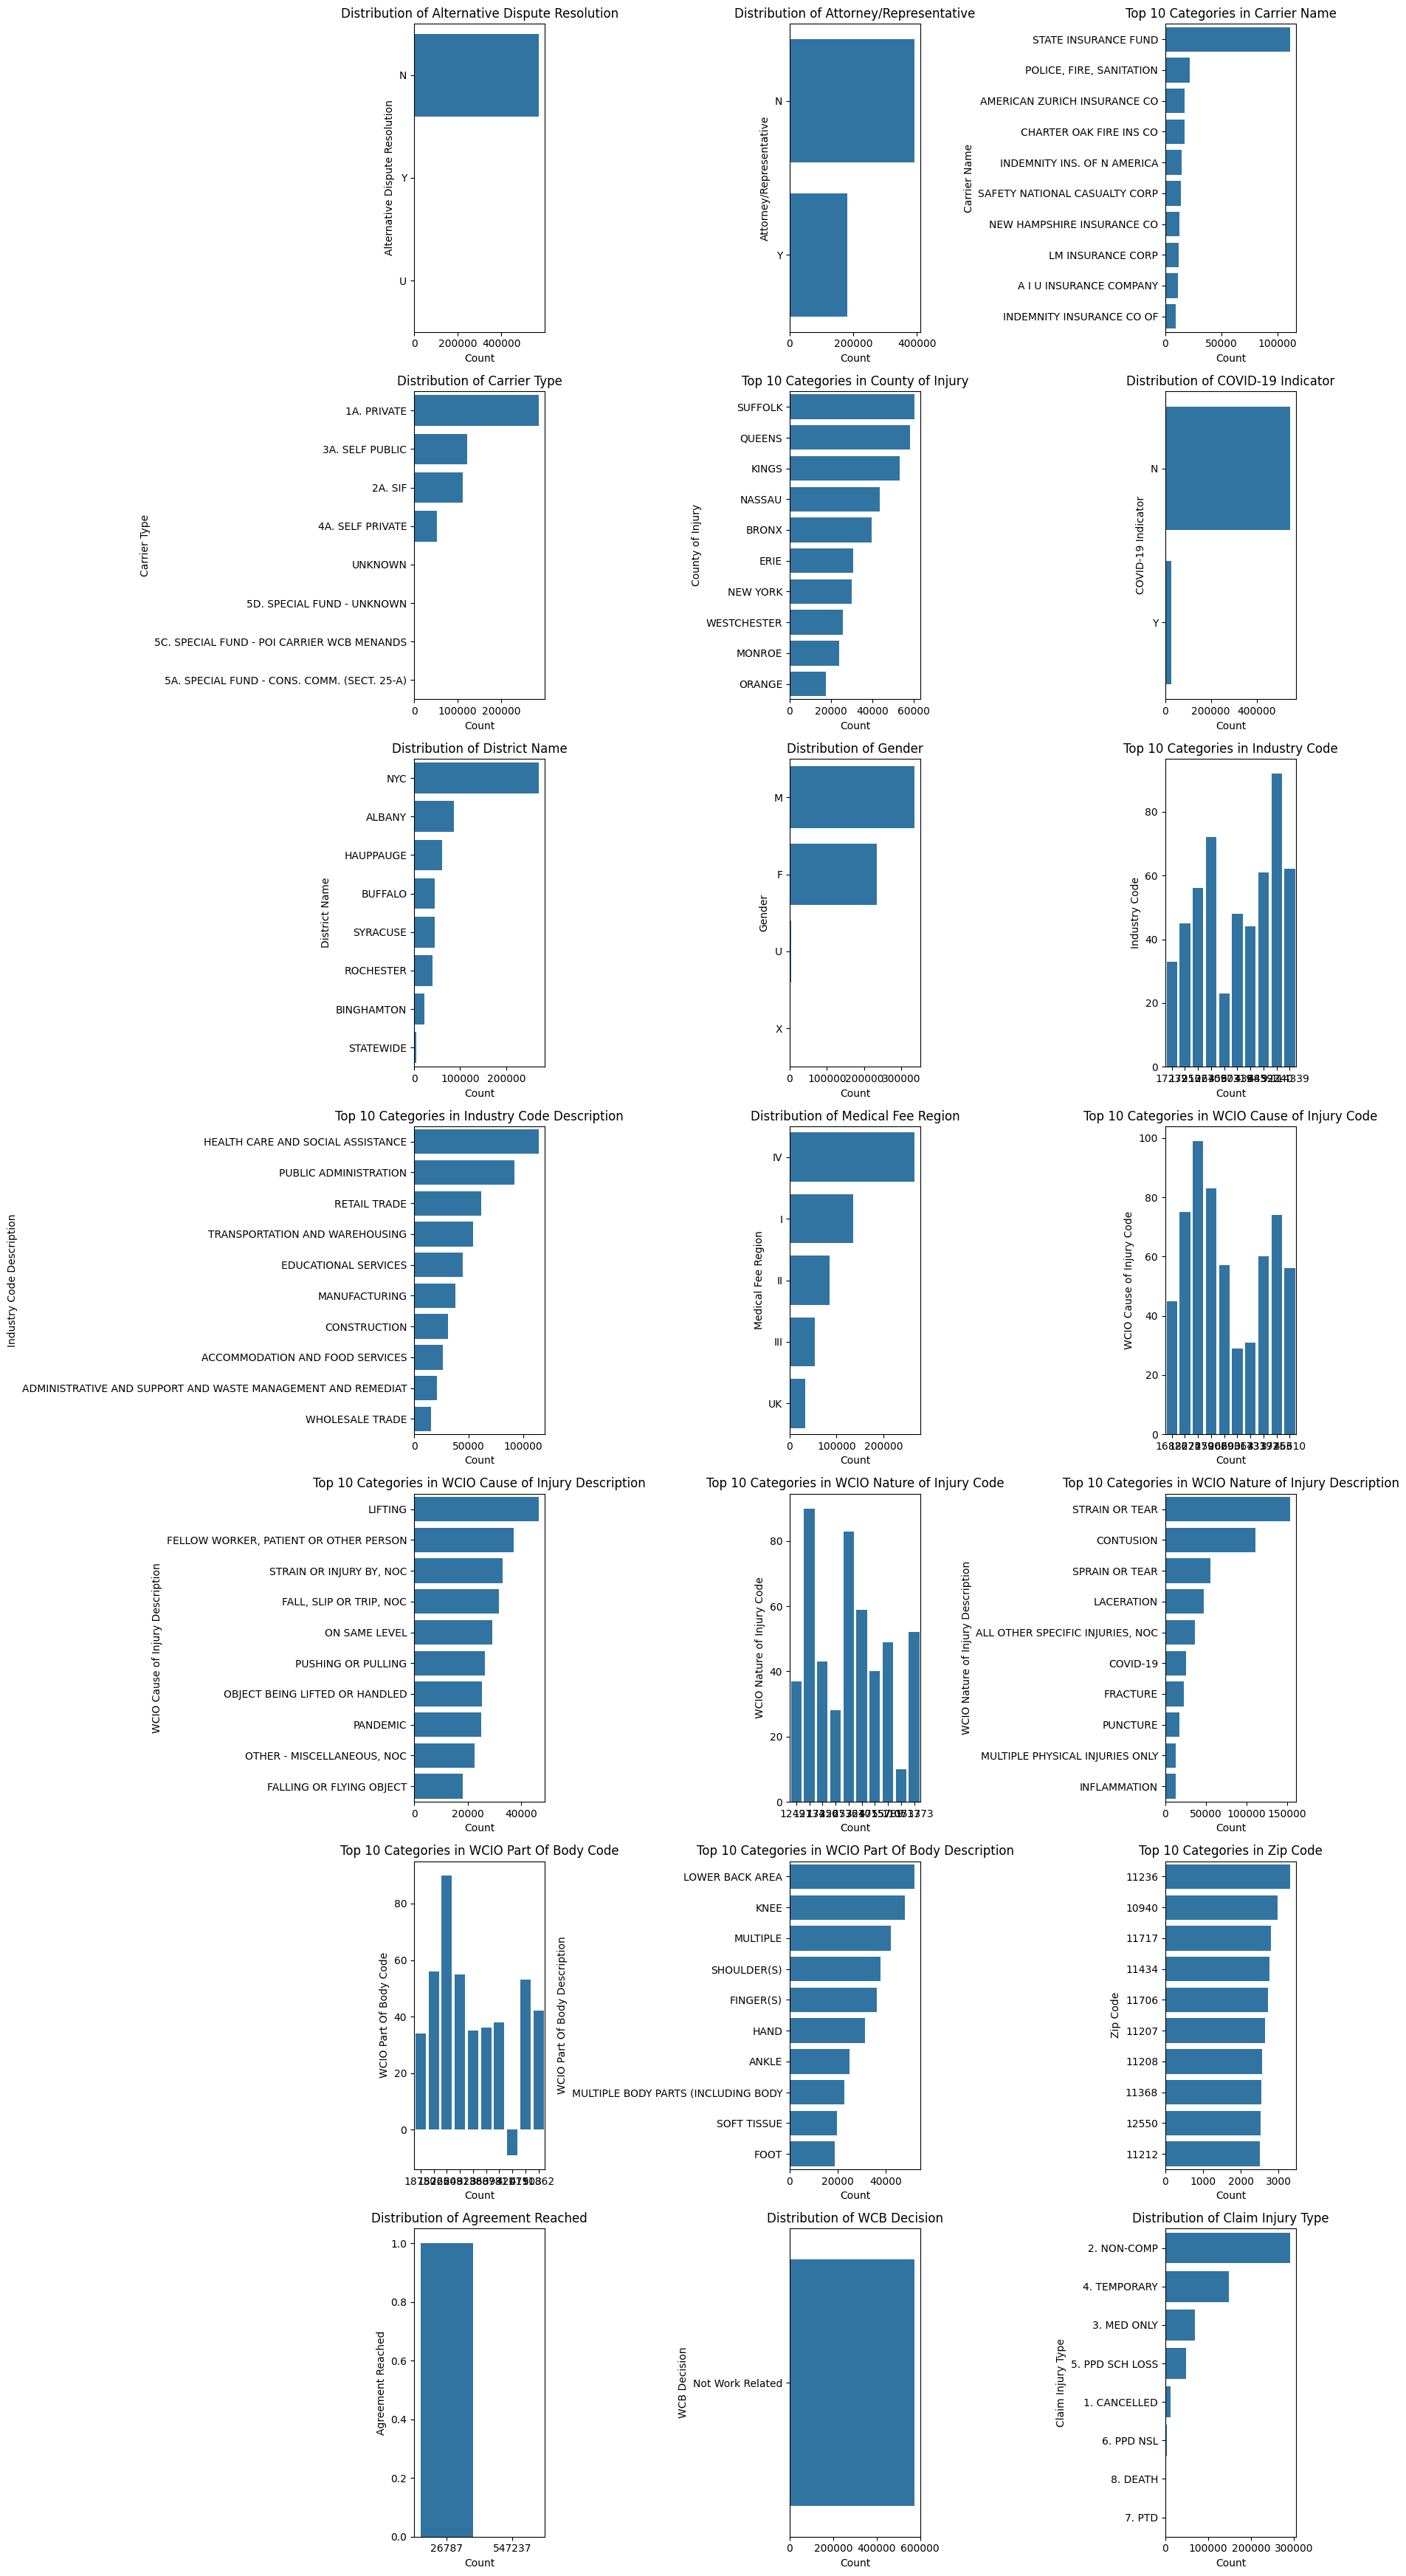

In [33]:
# Run the visualization
plot_categorical_features(categorical_df, categorical_features)

*Number of cases in each county*

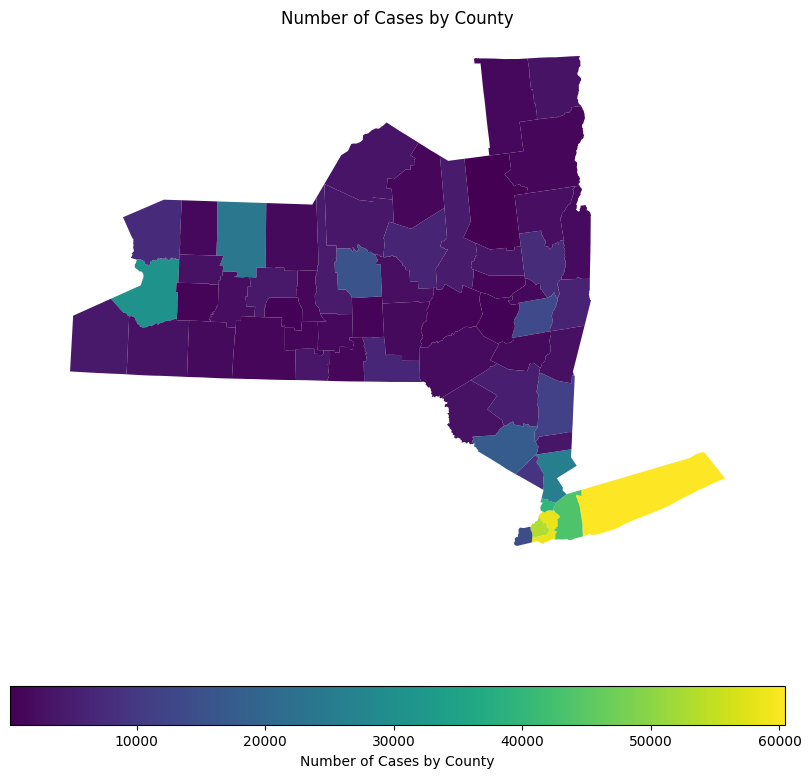

In [34]:
plot_cases_by_county(train_df)

#### <span style="color:salmon"> 2.7 Date Variables </span> 

In [35]:
date_features = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

In [36]:
date_train_df = train_df[date_features]
date_train_df

,Accident Date,Assembly Date,C-2 Date,C-3 Date,First Hearing Date
Claim Identifier,,,,,
5393875,2019-12-30,2020-01-01,2019-12-31,NaN,NaN
5393091,2019-08-30,2020-01-01,2020-01-01,2020-01-14,2020-02-21
5393889,2019-12-06,2020-01-01,2020-01-01,NaN,NaN
5393887,2019-12-30,2020-01-01,2019-12-31,NaN,NaN
5393863,2019-12-26,2020-01-01,2019-12-31,NaN,NaN
...,...,...,...,...,...
6165265,2022-12-14,2022-12-30,2022-12-30,NaN,NaN
6165285,2022-12-15,2022-12-31,2022-12-31,NaN,NaN
6165506,2022-12-13,2022-12-31,2022-12-31,NaN,NaN


## <span style="color:salmon"> 3. Clean and pre-processing  </span> 

The transformations applied in the training dataset must also be applied to the validation and test dataset. As such, at the start of this section we will import the test dataset and create the validation dataset when its necessary to avoid information leakage.

In [37]:
test_df = pd.read_csv('./project_data/test_data.csv', index_col='Claim Identifier')
test_df

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
6166047,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
6166102,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52,N,2024-06-05,N,NaN,1960.0,2012-10-23,NaN,STATE INSURANCE FUND,...,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13619,5
6553119,2024-05-22,59,N,2024-06-05,Y,0.0,1965.0,NaN,2024-05-28,NYC TRANSIT AUTHORITY,...,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11776,1
6553542,2024-05-06,45,N,2024-06-05,Y,0.0,1979.0,NaN,NaN,STATE INSURANCE FUND,...,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11368,5


Before strating cleaning and preprocessing the dataframes, we decided to compare the two dataframes.

In [38]:
# Get the columns that are in train_df but not in test_df
missing_columns_in_test = set(train_df.columns) - set(test_df.columns)

# Print the result
print("Columns in train_df but not in test_df:", missing_columns_in_test)


Columns in train_df but not in test_df: {'Claim Injury Type', 'WCB Decision', 'Agreement Reached'}


Above, we can see that `test_df` does not have three columns that are in`train_df`. One is the target and the other we are going to put on the side.

#### <span style="color:salmon"> 3.1 Data Types </span> 

To see the types of each columns of the dataset

In [39]:
train_df.dtypes

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                     object
OIICS Nature of Injury Description

In [40]:
test_df.dtypes

Accident Date                          object
Age at Injury                           int64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                     object
OIICS Nature of Injury Description    float64
WCIO Cause of Injury Code         

Above, it can be seen that the dates are considered objects while they should be considered dates. Additionally, the variables hat are codes should be considered strings not floats.

*Change date columns data type:*

In [41]:
# Select date columns
date_cols = train_df.columns[train_df.columns.str.contains('Date')]
# Transform into date using pandas
train_df[date_cols] = train_df[date_cols].apply(pd.to_datetime)
test_df[date_cols] = test_df[date_cols].apply(pd.to_datetime)

*Change code columns to strings:*

In [42]:
# Select code columns
code_cols = train_df.columns[train_df.columns.str.contains('Code')]
# Transform code columns to float
train_df[code_cols] = train_df[code_cols].astype('str')
test_df[code_cols] = test_df[code_cols].astype('str')

Also, the data type of the column "Age at Injury" and "Birth Year" is float, and we have to change to int

In [43]:
train_df['Birth Year'] = pd.to_numeric(train_df['Birth Year'], errors='coerce').astype('Int64')
test_df['Birth Year'] = pd.to_numeric(test_df['Birth Year'], errors='coerce').astype('Int64')

train_df['Age at Injury'] = pd.to_numeric(train_df['Age at Injury'], errors='coerce').astype('Int64')
test_df['Age at Injury'] = pd.to_numeric(test_df['Age at Injury'], errors='coerce').astype('Int64')

#### <span style="color:salmon">  3.2 Incoherencies </span> 

1. There is some "Birth date" equal to 0. This values should became NAN values.

In [44]:
train_df['Birth Year'].value_counts().sort_index()

Birth Year
0       25081
1900        2
1901       30
1902       28
1903       35
        ...  
2011        6
2012        2
2013        1
2014        2
2018        2
Name: count, Length: 107, dtype: Int64

In [45]:
train_df['Birth Year'] = train_df['Birth Year'].replace(0, np.nan)
test_df['Birth Year'] = test_df['Birth Year'].replace(0, np.nan)

2. The min Age at injury shoudn´t be equal to 0


In [46]:
train_df['Age at Injury'] = train_df['Age at Injury'].replace(0, np.nan)
test_df['Age at Injury'] = test_df['Age at Injury'].replace(0, np.nan)

3. "Person Age" shoud be greather than "Age at injury"

In [47]:
# Calculate the age at accident (from the birth year and accident date)
train_df['Calculated_Age_at_Accident'] = train_df['Accident Date'].dt.year - train_df['Birth Year']

In [48]:
train_df[(train_df['Age at Injury'].notna()) & 
                 (train_df['Calculated_Age_at_Accident'].notna()) &
                 (train_df['Age at Injury'] != train_df['Calculated_Age_at_Accident']) &
                 (abs(train_df['Age at Injury'] - train_df['Calculated_Age_at_Accident']) > 1)]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Calculated_Age_at_Accident
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


In [49]:
train_df = train_df.drop('Calculated_Age_at_Accident', axis=1)

4. Average Weekly Wage shouldn´t be eaqual to 0 in min

In [50]:
train_df['Average Weekly Wage'] = train_df['Average Weekly Wage'].replace(0, np.nan)
test_df['Average Weekly Wage'] = test_df['Average Weekly Wage'].replace(0, np.nan)

5. Compare the variables Industry Code and Industry Code Description, but there there is no inconsistency

In [51]:
train_df.groupby('Industry Code')['Industry Code Description'].nunique().eq(1)

Industry Code
11.0    True
21.0    True
22.0    True
23.0    True
31.0    True
32.0    True
33.0    True
42.0    True
44.0    True
45.0    True
48.0    True
49.0    True
51.0    True
52.0    True
53.0    True
54.0    True
55.0    True
56.0    True
61.0    True
62.0    True
71.0    True
72.0    True
81.0    True
92.0    True
nan     True
Name: Industry Code Description, dtype: bool

#### <span style="color:salmon"> 3.3 Handling Missing Values </span>

Before starting, let's check the columns that can be dropped or inputed.

In [52]:
# Display the percentage of missing values per column

missing_values = train_df.isnull().sum() / len(train_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

OIICS Nature of Injury Description    100.000000
IME-4 Count                            76.864556
First Hearing Date                     73.730018
C-3 Date                               67.380632
Average Weekly Wage                    63.429229
Birth Year                              9.434971
WCIO Part Of Body Description           2.975485
WCIO Nature of Injury Description       2.727238
WCIO Cause of Injury Description        2.724276
C-2 Date                                2.536131
Age at Injury                           0.951528
Accident Date                           0.642308
dtype: float64

In [53]:
# Display the percentage of missing values per column

missing_values = test_df.isnull().sum() / len(test_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

OIICS Nature of Injury Description    100.000000
IME-4 Count                            90.914621
First Hearing Date                     88.909595
Average Weekly Wage                    86.539854
C-3 Date                               78.035698
Birth Year                             10.069205
WCIO Nature of Injury Description       2.721825
WCIO Cause of Injury Description        2.667182
WCIO Part Of Body Description           2.461241
C-2 Date                                2.354275
Age at Injury                           0.837167
Accident Date                           0.629937
dtype: float64

We decided to drop `OIICS Nature of Injury Description` because it only has missing values.

In [54]:
train_df = train_df.drop('OIICS Nature of Injury Description', axis = 1)
test_df = test_df.drop('OIICS Nature of Injury Description', axis = 1)

*Input `Accident Date`*

The second variable that we decided to tackle is `Accident Date`. While exploring the dataset, we noticed that in some cases that date is the same as `Assembly Date`. As such, we decided to replace the missing values with the other date.

In [55]:
train_df[train_df['Accident Date'] == train_df['Assembly Date']]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393820,2020-01-02,57,N,2020-01-02,Y,2175.45,1963,2020-06-05,2019-12-26,INDEMNITY INSURANCE CO OF,...,97.0,REPETITIVE MOTION,78.0,CARPAL TUNNEL SYNDROME,39.0,WRIST (S) & HAND(S),13476,0.0,Not Work Related,1.0
5394146,2020-01-02,76,N,2020-01-02,Y,549.26,<NA>,2020-02-11,2019-12-26,BOARD OF EDUCATION CNY,...,98.0,"CUMULATIVE, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",31.0,UPPER ARM,75056,0.0,Not Work Related,2.0
5394780,2020-01-02,65,N,2020-01-02,N,NaN,1954,2020-01-02,NaT,STATE INSURANCE FUND,...,98.0,"CUMULATIVE, NOC",52.0,STRAIN OR TEAR,38.0,SHOULDER(S),14042,0.0,Not Work Related,5.0
5394376,2020-01-02,37,N,2020-01-02,N,1124.57,1982,2020-01-02,NaT,CHARTER OAK FIRE INS CO,...,18.0,"POWERED HAND TOOL, APPLIANCE",40.0,LACERATION,36.0,FINGER(S),11714,0.0,Not Work Related,1.0
5395577,2020-01-03,58,N,2020-01-03,N,1428.33,1961,2020-01-03,NaT,STATE INSURANCE FUND,...,17.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,19.0,FACIAL BONES,11901,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164198,2022-12-29,25,N,2022-12-29,N,NaN,1997,2022-12-29,NaT,STATE INSURANCE FUND,...,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11726,0.0,Not Work Related,3.0
6164657,2022-12-29,27,N,2022-12-29,N,1163.54,1995,2022-12-29,NaT,STATE INSURANCE FUND,...,32.0,ON ICE OR SNOW,10.0,CONTUSION,42.0,LOWER BACK AREA,11356,0.0,Not Work Related,6.0
6163731,2022-12-29,47,N,2022-12-29,N,NaN,1975,2022-12-29,NaT,"WEGMANS FOOD MARKETS, INC.",...,32.0,ON ICE OR SNOW,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,14215,0.0,Not Work Related,6.0


In [56]:
# Filter the rows where 'Accident Date' is NaN, but 'Assembly Date' is not NaN
condition = train_df['Accident Date'].isna() & train_df['Assembly Date'].notna()

# Replace missing 'Accident Date' with 'Assembly Date' where the condition is true
train_df.loc[condition, 'Accident Date'] = train_df.loc[condition, 'Assembly Date']

In [57]:
# Filter the rows where 'Accident Date' is NaN, but 'Assembly Date' is not NaN in the test dataset
condition = test_df['Accident Date'].isna() & test_df['Assembly Date'].notna()

# Replace missing 'Accident Date' with 'Assembly Date' where the condition is true in the test dataset
test_df.loc[condition, 'Accident Date'] = test_df.loc[condition, 'Assembly Date']

*Calculate `Age at Injury`*

Afte, we can easily input are related to age/birth year. By using the relationship between `Age at Injury`, `Accident Date` and `Birth Year`, we can easily calculate some missing values.

In [58]:
# Filter the rows where 'Age at Injury' is NaN, but 'Birth Year' and 'Accident Date' are not NaN
condition = train_df['Age at Injury'].isna() & train_df['Birth Year'].notna() & train_df['Accident Date'].notna()

# Replace missing 'Age at Injury' with the difference between 'Accident Date' and 'Birth Year'
train_df.loc[condition, 'Age at Injury'] = train_df.loc[condition, 'Accident Date'].dt.year - train_df.loc[condition, 'Birth Year']


# Filter the rows where 'Age at Injury' is NaN, but 'Birth Year' and 'Accident Date' are not NaN in the test dataset
condition = test_df['Age at Injury'].isna() & test_df['Birth Year'].notna() & test_df['Accident Date'].notna()

# Replace missing 'Age at Injury' with the difference between 'Accident Date' and 'Birth Year' where the condition is true
test_df.loc[condition, 'Age at Injury'] = test_df.loc[condition, 'Accident Date'].dt.year - test_df.loc[condition, 'Birth Year']

*Calculate `Birth Year`*

In [59]:
# Filter the rows where 'Birth Year' is NaN, but 'Age at Injury' and 'Accident Date' are not NaN
condition = train_df['Birth Year'].isna() & train_df['Age at Injury'].notna() & train_df['Accident Date'].notna()

# Replace missing 'Birth Year' with the difference between 'Accident Date' year and 'Age at Injury'
train_df.loc[condition, 'Birth Year'] = train_df.loc[condition, 'Accident Date'].dt.year - train_df.loc[condition, 'Age at Injury']


# Filter the rows where 'Birth Year' is NaN, but 'Age at Injury' and 'Accident Date' are not NaN in the test dataset
condition = test_df['Birth Year'].isna() & test_df['Age at Injury'].notna() & test_df['Accident Date'].notna()

# Replace missing 'Birth Year' with the difference between 'Accident Date' year and 'Age at Injury' where the condition is true
test_df.loc[condition, 'Birth Year'] = test_df.loc[condition, 'Accident Date'].dt.year - test_df.loc[condition, 'Age at Injury']

*Input `IME-4 Count`*

The next colum is `IME-4 Count` which also has a high number of missing values. In this case, we started to explore the values that the variable already had.

In [60]:
train_df['IME-4 Count'].unique()

array([nan,  4.,  1.,  3.,  2.,  6.,  7.,  5., 10., 12.,  8.,  9., 11.,
       13., 14., 36., 15., 20., 19., 18., 27., 17., 16., 24., 22., 26.,
       21., 23., 30., 32., 39., 25., 29., 47., 48., 34., 28., 37., 31.,
       35., 33., 73.])

As this variables represents the number of IME-4 forms received per claim and its never 0, we reached the conclusion that the missing values mean that to IME4-forms was received for the claim. As such, we decided to replace the missing values with 0.

In [61]:
train_df['IME-4 Count'] = train_df['IME-4 Count'].fillna(0)
test_df['IME-4 Count'] = test_df['IME-4 Count'].fillna(0)

*Some Conclusions*

As for the other columns like `WCIO Part Of Body Description`, `WCIO Nature of Injury Description` and `WCIO Cause of Injury Description`, they are only essential to interpret the codes in the other columns so we decided not to do anything.

To conclude this section, we decided to see how many missing values we still have.

In [62]:
# Display the percentage of missing values per column

missing_values = train_df.isnull().sum() / len(train_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

First Hearing Date                   73.730018
C-3 Date                             67.380632
Average Weekly Wage                  63.429229
WCIO Part Of Body Description         2.975485
WCIO Nature of Injury Description     2.727238
WCIO Cause of Injury Description      2.724276
C-2 Date                              2.536131
Age at Injury                         0.380820
Birth Year                            0.380820
dtype: float64

In [63]:
# Display the percentage of missing values per column

missing_values = test_df.isnull().sum() / len(test_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

First Hearing Date                   88.909595
Average Weekly Wage                  86.539854
C-3 Date                             78.035698
WCIO Nature of Injury Description     2.721825
WCIO Cause of Injury Description      2.667182
WCIO Part Of Body Description         2.461241
C-2 Date                              2.354275
Age at Injury                         0.253109
Birth Year                            0.253109
dtype: float64

# Agora acontece no depois do split de data

The variables `Age at Injury`, `Birth Year` and `Average Weekly Wage` will be inputed using the median. However, due to the high amount of missing values in the last one, there is a high chance that it will not be used. As for the other two, only one will be inputed because the other can be calculated after having the otherone.

In the variable `First Hearing Date`, a blank space means the the claim has not yet had a hearing held. Additionally, missing values in `C2-Date` and `C3-Date` mean that the event is yet to happen. To distinguish this NAs from true missing values, we decided to replace them with -1. THis will be done in the section of feature engineering.

# Markdown abaixo ja n reflete a realidade

*Final Conclusions*

Now, its time to verify that there are no more unexpected missing values. The features that are allowed to have NAs at this point are: `First Hearing Date`, `C-3 Date`, `WCIO Part Of Body Description`, `WCIO Nature of Injury Description `, `WCIO Cause of Injury Description` and `C-2 Date`.

In [64]:
# Display the percentage of missing values per column

missing_values = train_df.isnull().sum() / len(train_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

First Hearing Date                   73.730018
C-3 Date                             67.380632
Average Weekly Wage                  63.429229
WCIO Part Of Body Description         2.975485
WCIO Nature of Injury Description     2.727238
WCIO Cause of Injury Description      2.724276
C-2 Date                              2.536131
Age at Injury                         0.380820
Birth Year                            0.380820
dtype: float64

In [65]:
# Display the percentage of missing values per column

missing_values = test_df.isnull().sum() / len(test_df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

First Hearing Date                   88.909595
Average Weekly Wage                  86.539854
C-3 Date                             78.035698
WCIO Nature of Injury Description     2.721825
WCIO Cause of Injury Description      2.667182
WCIO Part Of Body Description         2.461241
C-2 Date                              2.354275
Age at Injury                         0.253109
Birth Year                            0.253109
dtype: float64

#### <span style="color:salmon"> 3.4 Removing Outliers </span> DEVIAMOS OLHAR PARA ISTO POR CAUSA DO FEEDBACK GERAL

In [66]:
# No test tambem temos idades acima de 100

# Cap Age at Injury at 100 to handle potential outliers 
#train_df['Age at Injury'] = np.where(train_df['Age at Injury'] > 100, 100, train_df['Age at Injury'])

We use the method Z-score to identify the outliers based on the number of standard deviations from the mean. The threshold that we use is 3. That means that any data point with a Z-score beyond this range is considered an outlier.

In [67]:
#numerical_df = numerical_df[(np.abs(stats.zscore(numerical_df)) < 3).all(axis=1)]

## <span style="color:salmon"> 4. Feature Engineering </span> 

#### <span style="color:salmon"> 4.1 Creating New Features </span> 

*Date Features*

Dates can hold a lot of valuable information. We can extract components like year, month, and day of the week, which may capture seasonality or trends.<br><br>
For the date columns:<br>
__1. Year, Month, Day:__ These could provide insights on seasonality.<br>
__2. Day of Week:__ Useful for identifying patterns on specific days.<br>
__3. Time Differences:__ Calculating time spans between dates can be useful for tracking progress or delays in cases.

# Novo passo aqui, criar as dummies

In [68]:
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date', 'Age at Injury', 'Birth Year']

for col in date_columns:
    train_df[f"Known {col}"] = train_df[col].notna().astype(int)
    test_df[f"Known {col}"] = test_df[col].notna().astype(int)

In [69]:
# List of date columns to extract components from
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

# Loop through each date column and extract year, month, day, and day of the week
for col in date_columns:
    # Extract components from each date column, filling missing values with -1
    train_df[f'{col}_Year'] = train_df[col].dt.year.fillna(-1).astype(int)
    train_df[f'{col}_Month'] = train_df[col].dt.month.fillna(-1).astype(int)
    train_df[f'{col}_Day'] = train_df[col].dt.day.fillna(-1).astype(int)
    train_df[f'{col}_DayOfWeek'] = train_df[col].dt.dayofweek.fillna(-1).astype(int)

In [70]:
# List of date columns to extract components from
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

# Loop through each date column and extract year, month, day, and day of the week
for col in date_columns:
    # Extract components from each date column in test_df, filling missing values with -1
    test_df[f'{col}_Year'] = test_df[col].dt.year.fillna(-1).astype(int)
    test_df[f'{col}_Month'] = test_df[col].dt.month.fillna(-1).astype(int)
    test_df[f'{col}_Day'] = test_df[col].dt.day.fillna(-1).astype(int)
    test_df[f'{col}_DayOfWeek'] = test_df[col].dt.dayofweek.fillna(-1).astype(int)

*Calculate Time Differences*

Create new columns to capture the elapsed time between key dates, which can help understand delays or the timeline of events.

In [71]:
# Calculate the time difference between relevant dates
train_df['Days_to_First_Hearing'] = (train_df['First Hearing Date'] - train_df['Accident Date']).dt.days
train_df['Days_to_C2'] = (train_df['C-2 Date'] - train_df['Accident Date']).dt.days
train_df['Days_to_C3'] = (train_df['C-3 Date'] - train_df['Accident Date']).dt.days

train_df['Days_to_First_Hearing'] = train_df['Days_to_First_Hearing'].fillna(-1).astype(int)
train_df['Days_to_C2'] = train_df['Days_to_C2'].fillna(-1).astype(int)
train_df['Days_to_C3'] = train_df['Days_to_C3'].fillna(-1).astype(int)

In [72]:
# Calculate the time difference between relevant dates
test_df['Days_to_First_Hearing'] = (test_df['First Hearing Date'] - test_df['Accident Date']).dt.days
test_df['Days_to_C2'] = (test_df['C-2 Date'] - test_df['Accident Date']).dt.days
test_df['Days_to_C3'] = (test_df['C-3 Date'] - test_df['Accident Date']).dt.days

test_df['Days_to_First_Hearing'] = test_df['Days_to_First_Hearing'].fillna(-1).astype(int)
test_df['Days_to_C2'] = test_df['Days_to_C2'].fillna(-1).astype(int)
test_df['Days_to_C3'] = test_df['Days_to_C3'].fillna(-1).astype(int)

Numerical features may benefit from transformations to reduce skewness or enhance interpretability.

*Seasonality of Accident Date*

In [73]:
# Apply the function to the 'Accident Date' column
train_df['Accident_Season'] = train_df['Accident Date'].apply(get_season)
test_df['Accident_Season'] = test_df['Accident Date'].apply(get_season)

*Accident Timing Indicator (Weekend or Holiday)*

In [74]:
# Flag public holidays
train_df = flag_public_holiday_accidents(train_df, 'Accident Date')
test_df = flag_public_holiday_accidents(test_df, 'Accident Date')

In [75]:
# Flag weekends
train_df = flag_weekend_accidents(train_df, 'Accident Date')
test_df = flag_weekend_accidents(test_df, 'Accident Date')

#### <span style="color:salmon"> 4.2 Transforming Existing Features </span> 

*Modifying `Carrier Type`*

In the `Carrier Type` column, there are three values that are similar which represent different types of special funds. Only 9 special funds could be identified, leaving 1023 unkown. As such, we decided to join all of them in the unkown special funds.

In [76]:
train_df['Carrier Type'] = train_df['Carrier Type'].replace({'5C. SPECIAL FUND - POI CARRIER WCB MENANDS': '5D. SPECIAL FUND - UNKNOWN'})
train_df['Carrier Type'] = train_df['Carrier Type'].replace({'5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': '5D. SPECIAL FUND - UNKNOWN'})

test_df['Carrier Type'] = test_df['Carrier Type'].replace({'5C. SPECIAL FUND - POI CARRIER WCB MENANDS': '5D. SPECIAL FUND - UNKNOWN'})
test_df['Carrier Type'] = test_df['Carrier Type'].replace({'5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': '5D. SPECIAL FUND - UNKNOWN'})

*Modifying `Gender`*

In the `Gender` column, we replaced the values `U` and `X` with `Unknown`. The value `U` typically indicates "unknown" or unspecified gender, while `X` may signify a non-binary identity. By combining these two values into `Unknown`, we simplify the data, making it easier to analyze and interpret.

In [77]:
# Replace 'U' with 'Unknown'
train_df['Gender'] = train_df['Gender'].replace({'U': 'Unknown'})
# Replace 'X' with 'Unknown'
train_df['Gender'] = train_df['Gender'].replace({'X': 'Unknown'})

# Replace 'U' with 'Unknown'
test_df['Gender'] = test_df['Gender'].replace({'U': 'Unknown'})
# Replace 'X' with 'Unknown'
test_df['Gender'] = test_df['Gender'].replace({'X': 'Unknown'})

## <span style="color:salmon"> 5. Other Visualizations </span> 

In this next section, we are going to verify how our changes afted the data starting by the numerical variables. We started by creating a correlation matrix.

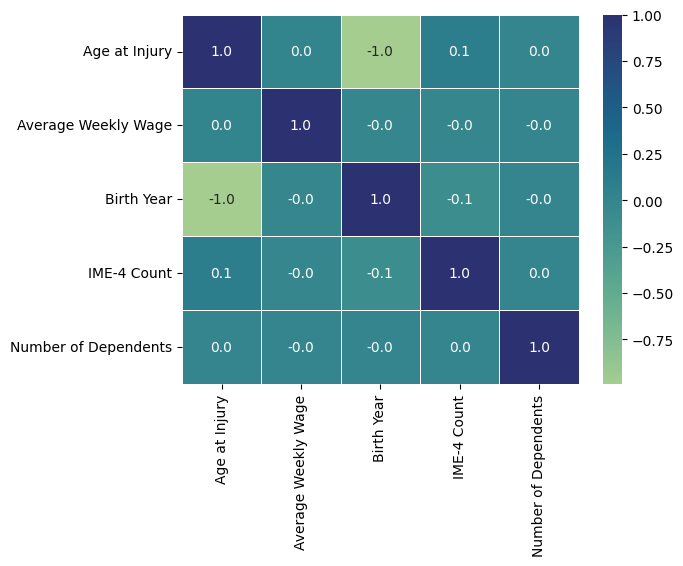

In [78]:
correlation_matrix = train_df[train_df[numerical_df.columns].columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidth=.5, cmap="crest")
plt.show()

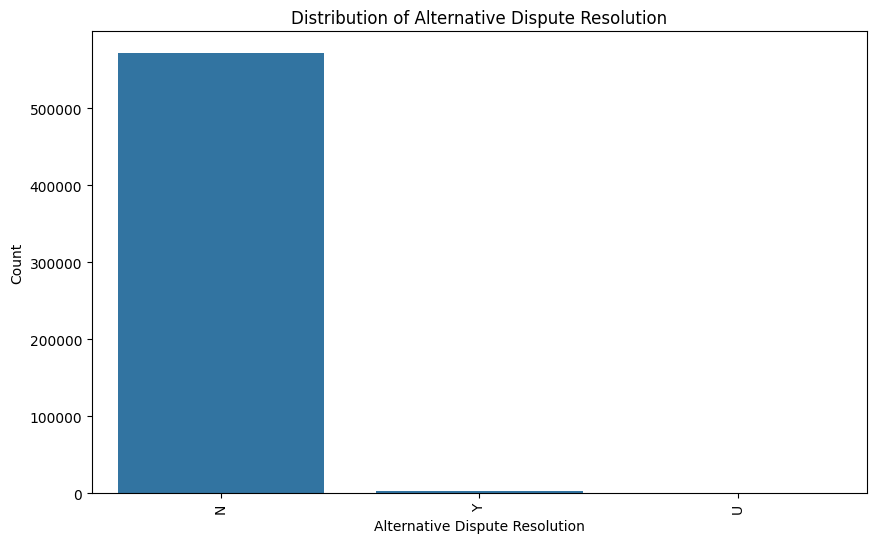

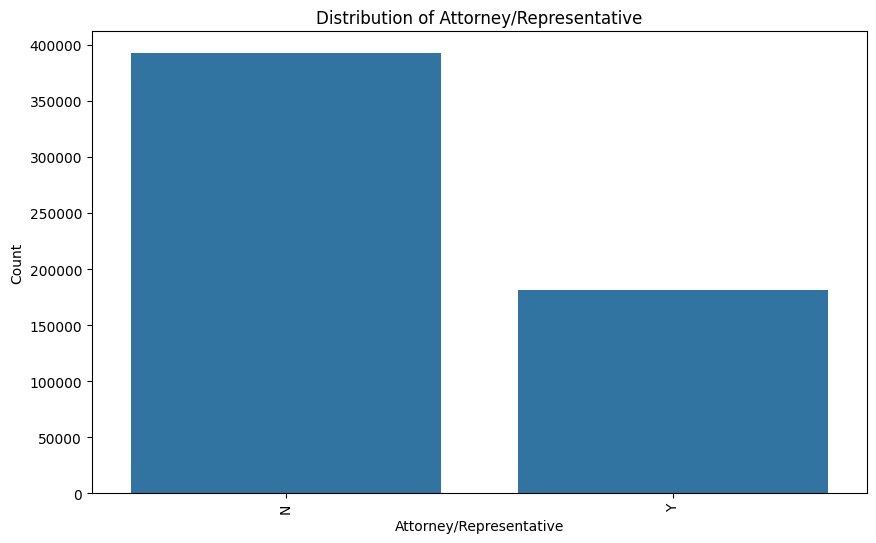

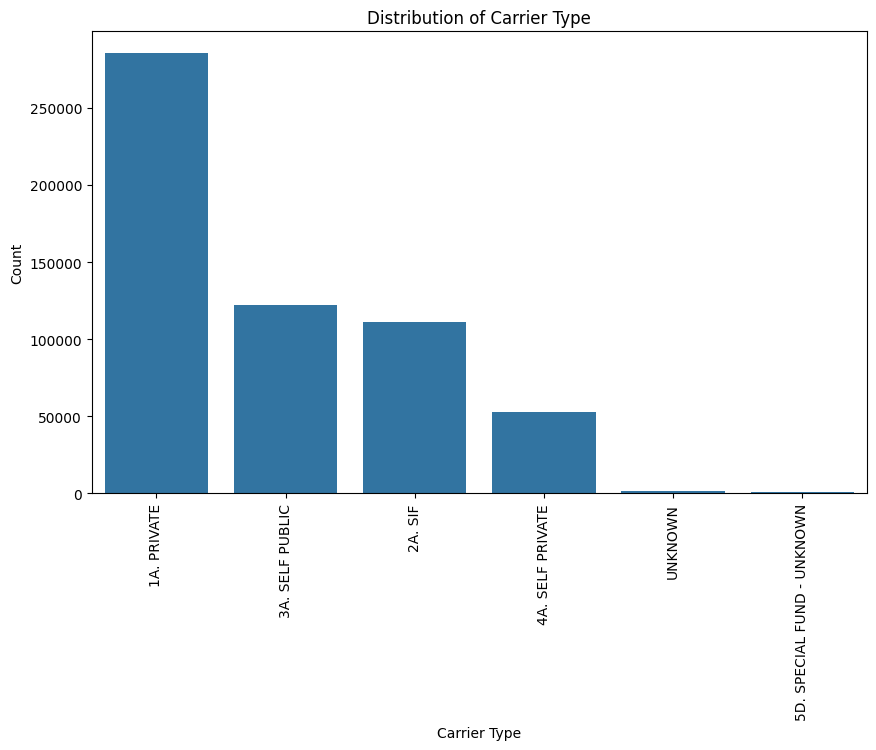

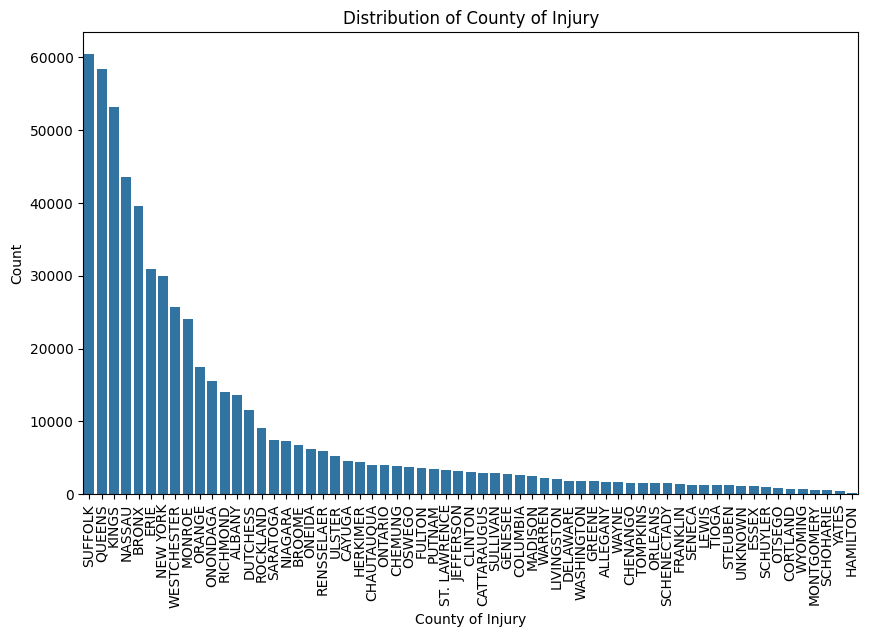

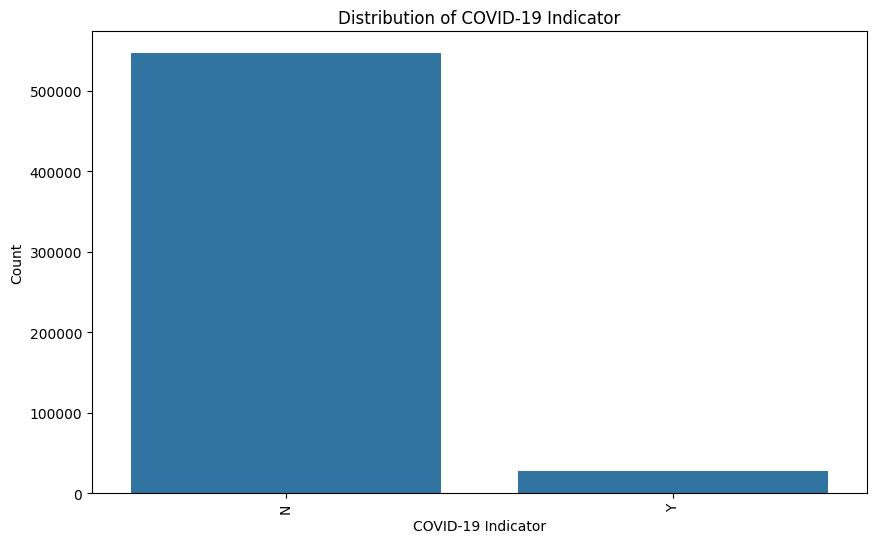

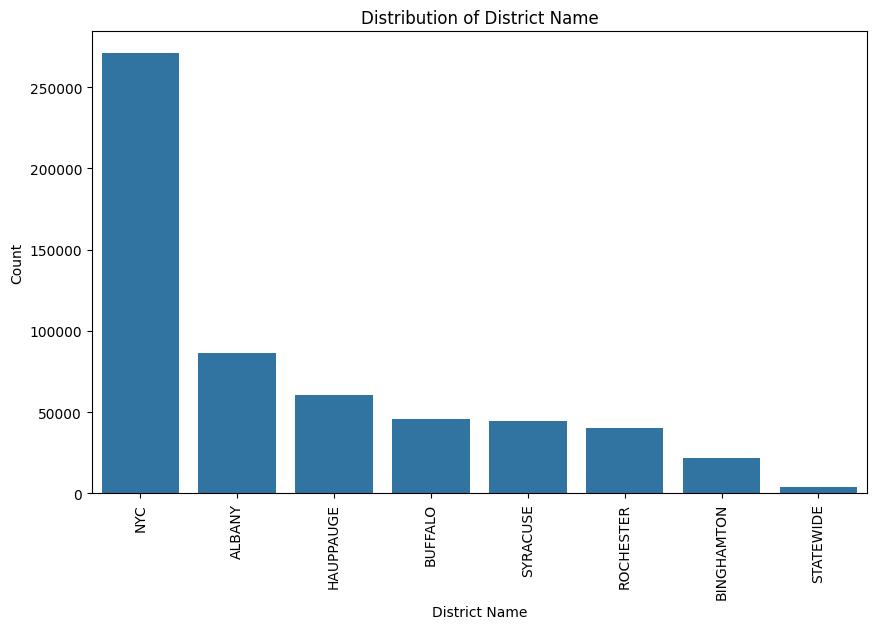

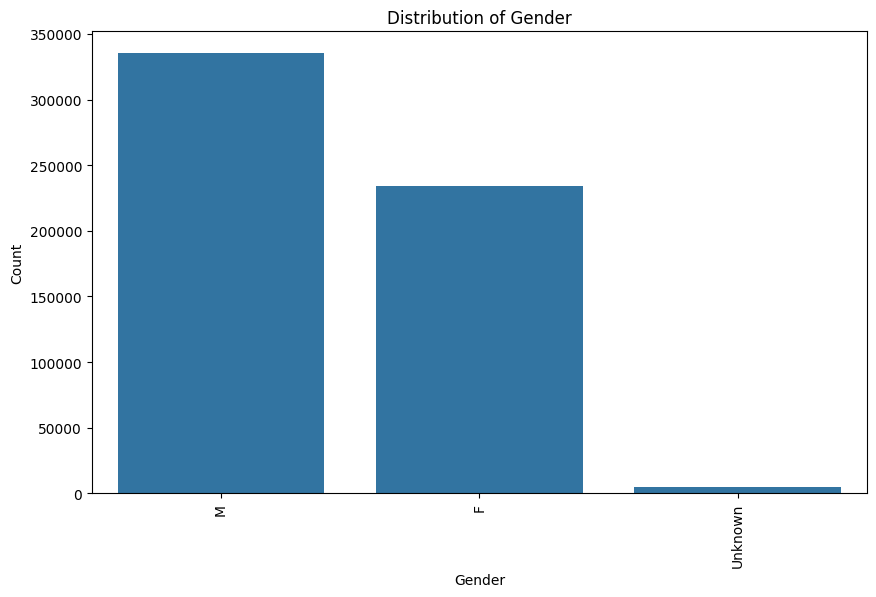

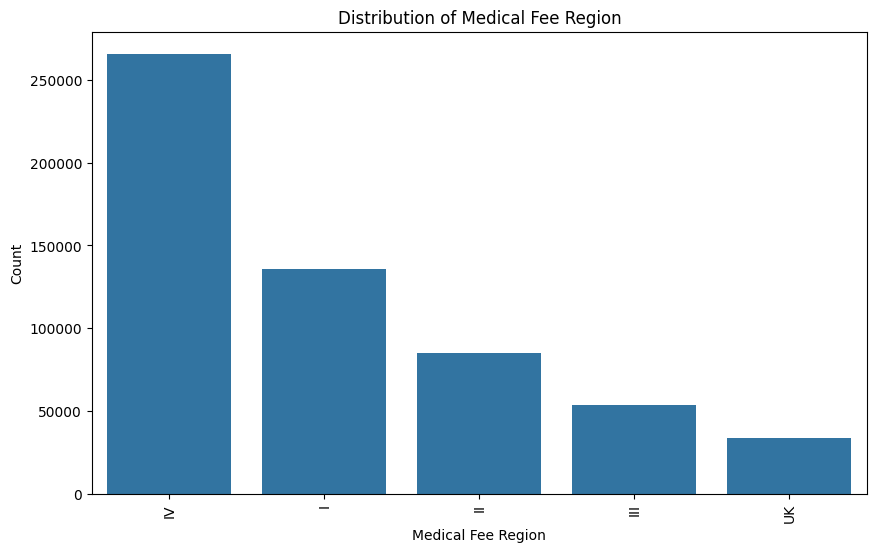

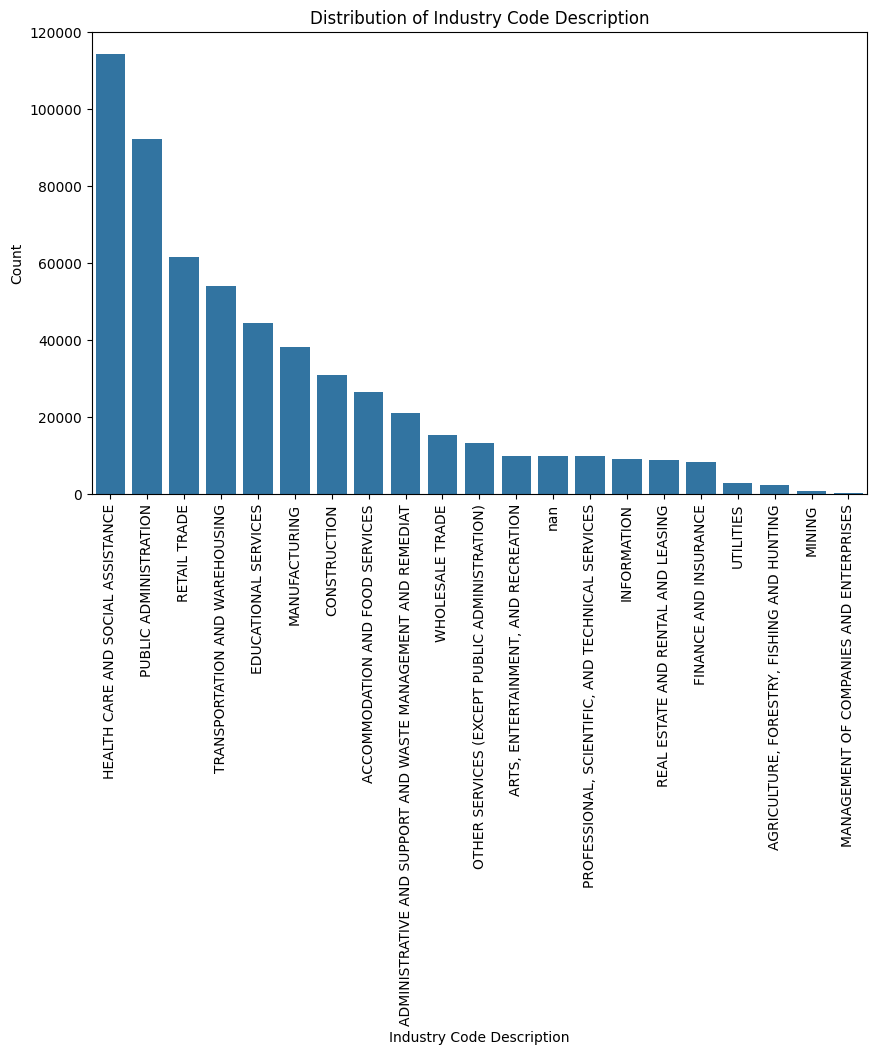

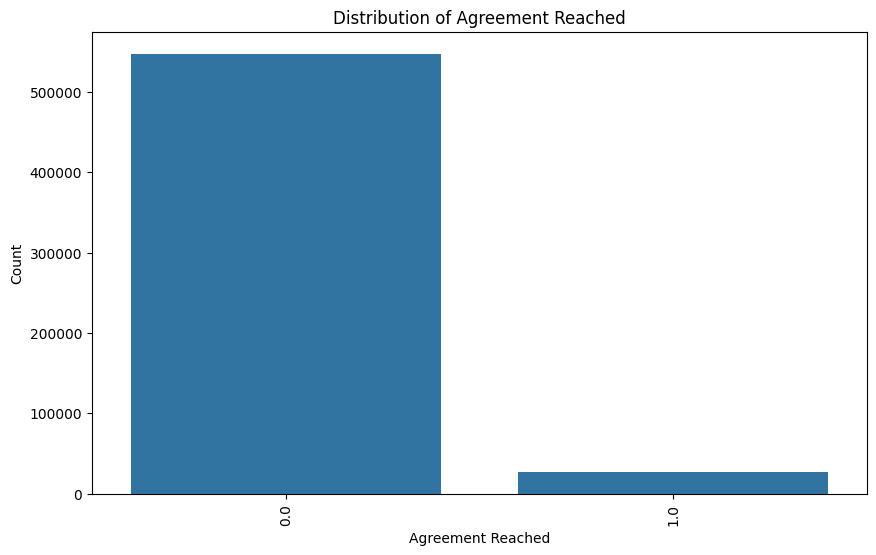

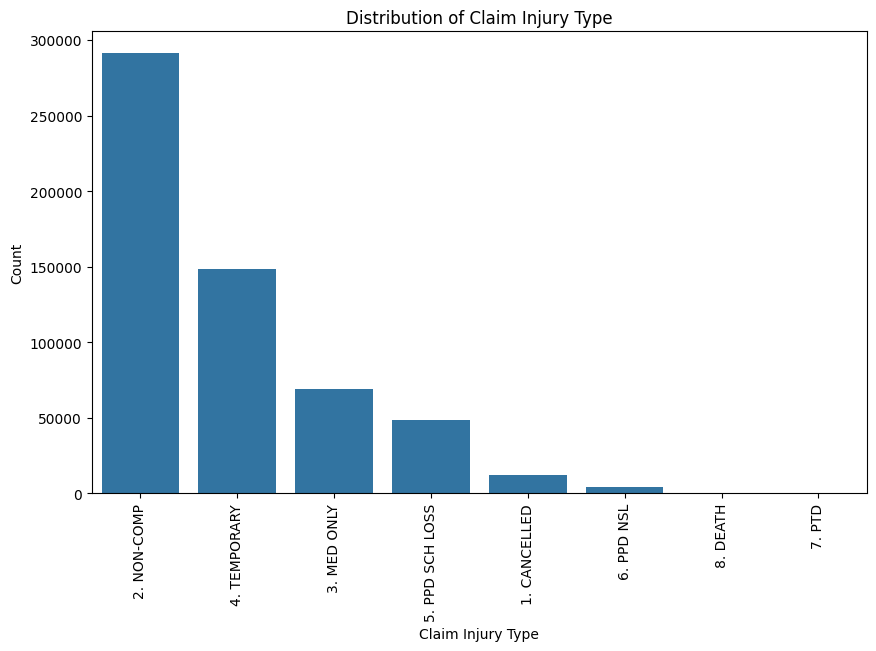

In [79]:
selected_categorical_features = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
                     'District Name', 'Gender', 'Medical Fee Region', 'Industry Code Description', 'Agreement Reached', 'Claim Injury Type']

for feature in selected_categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=train_df[feature], order=train_df[feature].value_counts().index) 
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for readability
    plt.show()

# Codigo fora do sitio

In [80]:
train_df.drop("Alternative Dispute Resolution",axis=1, inplace=True) # 99.5% dos dados são N, os outro 0.5% esta dividido entre Sim ou U
test_df.drop("Alternative Dispute Resolution",axis=1, inplace=True)

In [81]:
Risk_map = {
    "HEALTH CARE AND SOCIAL ASSISTANCE": 1,  # Medium risk
    "PUBLIC ADMINISTRATION": 0,             # Low risk
    "RETAIL TRADE": 1,                      # Medium risk
    "TRANSPORTATION AND WAREHOUSING": 2,    # High risk
    "EDUCATIONAL SERVICES": 0,              # Low risk
    "MANUFACTURING": 2,                     # High risk
    "CONSTRUCTION": 2,                      # High risk
    "ACCOMMODATION AND FOOD SERVICES": 1,   # Medium risk
    "ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT": 1, # Medium risk
    "WHOLESALE TRADE": 1,                   # Medium risk
    "OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)": 0, # Low risk
    "ARTS, ENTERTAINMENT, AND RECREATION": 1,           # Medium risk
    "PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES": 0, # Low risk
    "INFORMATION": 0,                        # Low risk
    "REAL ESTATE AND RENTAL AND LEASING": 0, # Low risk
    "FINANCE AND INSURANCE": 0,              # Low risk
    "UTILITIES": 2,                          # High risk
    "AGRICULTURE, FORESTRY, FISHING AND HUNTING": 2, # High risk
    "MINING": 2,                             # High risk
    "MANAGEMENT OF COMPANIES AND ENTERPRISES": 0, # Low risk
    "nan": 1 # Medium Risk
}

In [82]:
train_df["Risk_Level"] = train_df["Industry Code Description"].map(Risk_map)
test_df["Risk_Level"] = test_df["Industry Code Description"].map(Risk_map)

In [83]:
#train_df["WCIO Code"] = (
#    train_df["WCIO Cause of Injury Code"].apply(lambda x: str(int(x)) if pd.notna(x) else "NaN") + "_" +
#    train_df["WCIO Nature of Injury Code"].apply(lambda x: str(int(x)) if pd.notna(x) else "NaN") + "_" +
#    train_df["WCIO Part Of Body Code"].apply(lambda x: str(int(x)) if pd.notna(x) else "NaN")
#)
#test_df["WCIO Code"] = (
#    test_df["WCIO Cause of Injury Code"].apply(lambda x: str(int(x)) if pd.notna(x) else "NaN") + "_" +
#    test_df["WCIO Nature of Injury Code"].apply(lambda x: str(int(x)) if pd.notna(x) else "NaN") + "_" +
#    test_df["WCIO Part Of Body Code"].apply(lambda x: str(int(x)) if pd.notna(x) else "NaN")
#)

## <span style="color:salmon"> 6. Variable Encoding </span> 

To use the categorical variables, it is necessary to encode them as most models do not accept non-numerical values.

In [84]:
# One Hot

# Attorney/Representative
# Carrier Type
# COVID-19 Indicator
# Gender 

# frequency encoding

# "Carrier Name", "County of Injury", "District Name", "Gender", "Medical Fee Region", "Zip Code"

# Label Encoder: Claim Injury type

# Dummies: First hearing date, C-2 date e C-3 Date


*Attorney/Representative*

In [85]:
# Initialize the encoder
enc_ar = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform on the training data
train_df['Attorney/Representative'] = enc_ar.fit_transform(train_df[['Attorney/Representative']]).astype(int)

# Transform the test data using the same encoder
test_df['Attorney/Representative'] = enc_ar.transform(test_df[['Attorney/Representative']]).astype(int)

*Carrier Type*

In [86]:
# Define the custom order of categories for 'Carrier Type'
categories = [['UNKNOWN'] + sorted([cat for cat in train_df['Carrier Type'].unique() if cat != 'UNKNOWN'])]

# Initialize the OrdinalEncoder with the predefined categories
enc_ct = OrdinalEncoder(categories=categories)

# Apply the encoder to 'Carrier Type' in the training set
train_df['Carrier Type'] = enc_ct.fit_transform(train_df[['Carrier Type']]).astype(int)

# Apply the same encoding to the 'Carrier Type' column in test_df
test_df['Carrier Type'] = enc_ct.transform(test_df[['Carrier Type']]).astype(int)

*County of Injury*

In [87]:
find_duplicate_frequencies_and_map(train_df, 'County of Injury' , test_df)

No values have the same frequency. Mapping frequencies to new column.


*COVID-19 Indicator*

In [88]:
# Initialize OneHotEncoder and fit it to the training data
enc_covid = OneHotEncoder(sparse_output=False, drop='first')
train_df['COVID-19 Indicator'] = enc_covid.fit_transform(train_df[['COVID-19 Indicator']]).astype(int)

# Transform the test data using the same encoder
test_df['COVID-19 Indicator'] = enc_covid.transform(test_df[['COVID-19 Indicator']]).astype(int)

*District Name*

In [89]:
find_duplicate_frequencies_and_map(train_df, 'District Name', test_df)

No values have the same frequency. Mapping frequencies to new column.


*Gender*

In [90]:
# Perform one-hot encoding on 'Gender' in the training set
enc_gender = OneHotEncoder(sparse_output=False, drop=None)
encoded_gender = enc_gender.fit_transform(train_df[['Gender']])

# Convert the encoded array to a DataFrame
encoded_gender_train_df = pd.DataFrame(encoded_gender, columns=enc_gender.get_feature_names_out(['Gender']), index=train_df.index)

# Concatenate the one-hot encoded gender columns to the original DataFrame
train_df = pd.concat([train_df, encoded_gender_train_df], axis=1)

# Drop 'Gender_Unknown' column as it is the baseline column (if drop='first' was used, it would be dropped automatically)
train_df = train_df.drop('Gender_Unknown', axis=1)

# Transform the test data using the already fitted encoder
encoded_gender_test = enc_gender.transform(test_df[['Gender']])
encoded_gender_test_df = pd.DataFrame(encoded_gender_test, columns=enc_gender.get_feature_names_out(['Gender']), index=test_df.index)
test_df = pd.concat([test_df, encoded_gender_test_df], axis=1)

# Drop 'Gender_Unknown' column in test set, if necessary
test_df = test_df.drop('Gender_Unknown', axis=1)

*Industry Code*

In [91]:
find_duplicate_frequencies_and_map(train_df, 'Industry Code', test_df)

No values have the same frequency. Mapping frequencies to new column.


*Medical Fee Region*

In [92]:
# Perform One-Hot Encoding for 'Medical Fee Region' in training_df
enc_med_fee_reg = OneHotEncoder(sparse_output=False, drop=None)

# Perform one-hot encoding and return as a dense array (not sparse)
encoded_med_fee_reg = enc_med_fee_reg.fit_transform(train_df[['Medical Fee Region']])

# Convert the array back to a DataFrame with aligned index
encoded_med_fee_reg_train_df = pd.DataFrame(encoded_med_fee_reg, columns=enc_med_fee_reg.get_feature_names_out(['Medical Fee Region']), index=train_df.index)

# Concatenate the one-hot encoded columns to the original training DataFrame
train_df = pd.concat([train_df, encoded_med_fee_reg_train_df], axis=1)

# Drop the 'Medical Fee Region_UK' column
train_df = train_df.drop('Medical Fee Region_UK', axis=1)

# Apply the same one-hot encoding to test_df using the fitted encoder
encoded_med_fee_reg_test = enc_med_fee_reg.transform(test_df[['Medical Fee Region']])

# Convert the encoded arrays to DataFrames
encoded_med_fee_reg_test_df = pd.DataFrame(encoded_med_fee_reg_test, columns=enc_med_fee_reg.get_feature_names_out(['Medical Fee Region']), index=test_df.index)

# Concatenate the encoded columns to validation_df and test_df
test_df = pd.concat([test_df, encoded_med_fee_reg_test_df], axis=1)

# Drop the 'Medical Fee Region_UK' column
test_df = test_df.drop('Medical Fee Region_UK', axis=1)

*WCIO Cause of Injury Code*

In [93]:
find_duplicate_frequencies_and_map(train_df, 'WCIO Cause of Injury Code', test_df)

No values have the same frequency. Mapping frequencies to new column.


*WCIO Nature of Injury Code*

In [94]:
find_duplicate_frequencies_and_map(train_df, 'WCIO Nature of Injury Code')

Some values have the same frequency.


Before applying OneHotEncoding, we decided to check the number of unique values to see how big our dataset would get.

In [95]:
print(f'This feature has {len(train_df["WCIO Nature of Injury Code"].unique())} unique values.')

This feature has 57 unique values.


57 is already a significant number but we decided to use HashEncoding.

In [96]:
# Initialize FeatureHasher with a suitable number of features (e.g., 20 bins)
hasher_injury_code = FeatureHasher(n_features=20, input_type='string')

# Apply hash encoding for 'WCIO Nature of Injury Code' in the training dataset
injury_code_hashed = hasher_injury_code.transform(train_df[['WCIO Nature of Injury Code']].astype(str).values)

# Convert the hashed sparse matrix to a DataFrame
injury_code_hashed_df = pd.DataFrame(injury_code_hashed.toarray(), index=train_df.index)

# Rename columns to make them more meaningful
injury_code_hashed_df.columns = [f"Nature_Injury_Code_Hash_{i}" for i in range(injury_code_hashed_df.shape[1])]

# Concatenate the hashed DataFrame with the original training DataFrame
train_df = pd.concat([train_df, injury_code_hashed_df], axis=1)

# Repeat the same process for the test dataset
injury_code_hashed_test = hasher_injury_code.transform(test_df[['WCIO Nature of Injury Code']].astype(str).values)
injury_code_hashed_test_df = pd.DataFrame(injury_code_hashed_test.toarray(), index=test_df.index)

# Rename columns for the test DataFrame
injury_code_hashed_test_df.columns = [f"Nature_Injury_Code_Hash_{i}" for i in range(injury_code_hashed_test_df.shape[1])]

# Concatenate with the test DataFrame
test_df = pd.concat([test_df, injury_code_hashed_test_df], axis=1)

*WCIO Part of Body Code*

In [97]:
find_duplicate_frequencies_and_map(train_df, 'WCIO Part Of Body Code', test_df)

Some values have the same frequency.


*Zip Code*

In [98]:
find_duplicate_frequencies_and_map(train_df, 'Zip Code')

Some values have the same frequency.


Before applying OneHotEncoding, we decided to check the number of unique values to see how big our dataset would get.

In [99]:
unique_values = len(train_df["Zip Code"].unique())
print(f"This feature has {unique_values} unique values.")

This feature has 10061 unique values.


In this case, there are too many different values to use one hot encoding.

In [100]:
# Initialize FeatureHasher with a suitable number of features (e.g., 20 bins)
hasher = FeatureHasher(n_features=20, input_type='string')

# Apply hash encoding for the training dataset
zip_code_hashed = hasher.transform(train_df[['Zip Code']].astype(str).values)

# Convert the hashed sparse matrix to a DataFrame
zip_code_hashed_df = pd.DataFrame(zip_code_hashed.toarray(), index=train_df.index)

# Rename columns to something more meaningful
zip_code_hashed_df.columns = [f"Zip_Code_Hash_{i}" for i in range(zip_code_hashed_df.shape[1])]

# Concatenate the hashed DataFrame with the original training DataFrame
train_df = pd.concat([train_df, zip_code_hashed_df], axis=1)

# Repeat the same process for the test dataset
zip_code_hashed_test = hasher.transform(test_df[['Zip Code']].astype(str).values)
zip_code_hashed_test_df = pd.DataFrame(zip_code_hashed_test.toarray(), index=test_df.index)

# Rename columns for test DataFrame
zip_code_hashed_test_df.columns = [f"Zip_Code_Hash_{i}" for i in range(zip_code_hashed_test_df.shape[1])]

# Concatenate with the test DataFrame
test_df = pd.concat([test_df, zip_code_hashed_test_df], axis=1)

*Claim Injury Type* - Target

In [101]:
# Create a sorted list of unique categories in the 'Claim Injury Type' column of training_df
categories = sorted(cat for cat in train_df['Claim Injury Type'].unique())

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the training data
label_encoder.fit(categories)

# Encode the 'Claim Injury Type' column in training_df
train_df['Claim Injury Type Encoded'] = label_encoder.transform(train_df['Claim Injury Type'])

*Season* - Seasonal

In [102]:
season_mapping = {"Winter": 0, "Spring": 1, "Summer": 2, "Fall": 3}

In [103]:
train_df = sine_cosine_encoding(train_df, "Accident_Season", season_mapping )
test_df = sine_cosine_encoding(test_df, "Accident_Season", season_mapping)

# Drops do Rui

In [104]:
code_descriptions = ["Industry Code Description", "WCIO Cause of Injury Description","WCIO Nature of Injury Description","WCIO Part Of Body Description"]

In [105]:
train_df.drop(code_descriptions, axis=1, inplace=True)
test_df.drop(code_descriptions, axis=1, inplace=True)
train_df.drop(["Agreement Reached","WCB Decision"], axis=1, inplace = True) # Not in Test

In [106]:
to_drop = ["Attorney/Representative", "Carrier Type", "COVID-19 Indicator", "Gender",
                   "County of Injury", "District Name", "Gender", "Medical Fee Region", "Zip Code",
                   "Claim Injury Type", "Industry Code", 
                   "First Hearing Date", "C-2 Date", "C-3 Date",
                   "Carrier Name", "Assembly Date"
]

In [107]:
for col in to_drop:
    try:
        train_df.drop(col, axis=1, inplace=True)
    except KeyError:
        print(f"{col} not found in Train_df")
    try:
        test_df.drop(col, axis=1, inplace=True)
    except KeyError:
        print(f"{col} not found in Test_df")

Gender not found in Train_df
Gender not found in Test_df
Claim Injury Type not found in Test_df


## <span style="color:salmon"> 7. Export Data</span> 

In [108]:
folder_path = "./preprocessed_data/"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"Folder '{folder_path}' already exists.")

Folder './preprocessed_data/' already exists.


In [109]:
train_df.to_csv('./preprocessed_data/train_data.csv', index=True)
test_df.to_csv('./preprocessed_data/test_data.csv', index=True)

# Rui
- Encode ultimo dos WCIO codes
- Encode Carrier Name: Ainda N/ not needed


- Remover o split train e test: Done
- Drop NAs na Accident date e Birth Year: N sei o q fazer ja q test tem NAs
- Calcular Age/Birth Year com age at accident e accident date: Done
- Juntar X e U em gender (numeros baixos): Done
- Drop Codes Descriptions: Done
- Juntar os 3 injury codes num so: Done
- Fazer um risk map (dict) para converter o industry code, NAs -> Unkown e 1 (normal risk): Done
- Combinar Carrier Type (5-Unknows): Done
- Drop Alternative Dispute Resolution (99,5% N): Done
- Drop/NA idades que sáo abaixo de 14 (minimum work age US): Não podemos, test_df.min() = 5
- Fazer Dummies (0 e 1) para C-2, C-3 e First Hearing (if it happen or not): Done
- Fazer Age groups: Needs Change
- Drop as cols q n estão no test: Done


Extra:
-  o test dataset tem acima de 75% NAs em First Hearing, Average Weekly Wage e C-3 Date, nas data significa q ainda n aconteceu mas para Average Weekly Wage vamos ter de usar KNN inputer para ter um valor mais correto (Median bad)
-  Como first hearing no test tem muitos NAs talvez devamos drop a feature pq a informação é muito diferente do train
 

In [110]:
missing_percentage = train_df.isna().sum() / len(train_df) * 100
for col, percent in missing_percentage.items():
    if not percent == 0:
        print(f"{col}: {percent:.2f}% missing values")

Age at Injury: 0.38% missing values
Average Weekly Wage: 63.43% missing values
Birth Year: 0.38% missing values
